# SD

In [1]:
import tensorflow as tf
from tensorflow import keras as k
# from utils import utils_c
import os
import numpy as np

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
import os

# layers
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Convolution2D

# optimizers
from tensorflow.keras.optimizers import Adam

# preprocessing
from tensorflow.keras.preprocessing import image

In [2]:
!nvidia-smi

Sat Apr 20 11:13:54 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.54                 Driver Version: 396.54                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   50C    P0    77W / 149W |      0MiB / 11441MiB |     92%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
# dir vars here
HOME = '/home/ubuntu/sd/data/'
SHOME = HOME + 'sample/'
TMP = HOME + 'tmp/'

# utc = utils_c()
def makeDirs():
    os.makedirs('test')
    os.makedirs('train/human')
    os.makedirs('train/dog')
    os.makedirs('valid/human')
    os.makedirs('valid/dog')

In [4]:
# check number of images
def countImgs(path,dirType='train'):
    print("==== {}".format(dirType))
    if dirType == 'test':
        !ls -l $path$dirType/unknown/*.jpg | wc -l 
    elif dirType == 'valid' or dirType == 'train':
        print("human-")
        !ls -l $path$dirType/human/*.jpg | wc -l 
        print("dog-")
        !ls -l $path$dirType/dog/*.jpg | wc -l
    else:
        print("wrong dirType")


In [5]:
print (tf.keras.__version__)

2.1.6-tf


# Data preparation

In [14]:
!pwd

/home/ubuntu/sd


In [15]:
!mkdir data
%cd data
makeDirs()

/home/ubuntu/sd/data
/home/ubuntu/sd/data/sample


In [16]:
# download images
%cd $HOME
!mkdir tmp
%cd tmp
!wget http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

/home/ubuntu/sd/data
/home/ubuntu/sd/data/tmp
--2019-04-19 14:25:25--  http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304771808 (291M) [application/zip]
Saving to: ‘Stanford40_JPEGImages.zip’

Stanford40_JPEGImag 100%[===================>] 290.65M  14.6MB/s    in 21s     

2019-04-19 14:25:46 (13.9 MB/s) - ‘Stanford40_JPEGImages.zip’ saved [304771808/304771808]

--2019-04-19 14:25:46--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82

In [17]:
# extract images
%cd $TMP
!mkdir human
!mkdir dog
!unzip Stanford40_JPEGImages -d human
!tar -xvf images.tar -C dog

/home/ubuntu/sd/data/tmp
Archive:  Stanford40_JPEGImages.zip
   creating: human/JPEGImages/
  inflating: human/JPEGImages/applauding_001.jpg  
  inflating: human/JPEGImages/applauding_002.jpg  
  inflating: human/JPEGImages/applauding_003.jpg  
  inflating: human/JPEGImages/applauding_004.jpg  
  inflating: human/JPEGImages/applauding_005.jpg  
  inflating: human/JPEGImages/applauding_006.jpg  
  inflating: human/JPEGImages/applauding_007.jpg  
  inflating: human/JPEGImages/applauding_008.jpg  
  inflating: human/JPEGImages/applauding_009.jpg  
  inflating: human/JPEGImages/applauding_010.jpg  
  inflating: human/JPEGImages/applauding_011.jpg  
  inflating: human/JPEGImages/applauding_012.jpg  
  inflating: human/JPEGImages/applauding_013.jpg  
  inflating: human/JPEGImages/applauding_014.jpg  
  inflating: human/JPEGImages/applauding_015.jpg  
  inflating: human/JPEGImages/applauding_016.jpg  
  inflating: human/JPEGImages/applauding_017.jpg  
  inflating: human/JPEGImages/applauding_

  inflating: human/JPEGImages/applauding_195.jpg  
  inflating: human/JPEGImages/applauding_196.jpg  
  inflating: human/JPEGImages/applauding_197.jpg  
  inflating: human/JPEGImages/applauding_198.jpg  
  inflating: human/JPEGImages/applauding_199.jpg  
  inflating: human/JPEGImages/applauding_200.jpg  
  inflating: human/JPEGImages/applauding_201.jpg  
  inflating: human/JPEGImages/applauding_202.jpg  
  inflating: human/JPEGImages/applauding_203.jpg  
  inflating: human/JPEGImages/applauding_204.jpg  
  inflating: human/JPEGImages/applauding_205.jpg  
  inflating: human/JPEGImages/applauding_206.jpg  
  inflating: human/JPEGImages/applauding_207.jpg  
  inflating: human/JPEGImages/applauding_208.jpg  
  inflating: human/JPEGImages/applauding_209.jpg  
  inflating: human/JPEGImages/applauding_210.jpg  
  inflating: human/JPEGImages/applauding_211.jpg  
  inflating: human/JPEGImages/applauding_212.jpg  
  inflating: human/JPEGImages/applauding_213.jpg  
  inflating: human/JPEGImages/a

  inflating: human/JPEGImages/blowing_bubbles_078.jpg  
  inflating: human/JPEGImages/blowing_bubbles_079.jpg  
  inflating: human/JPEGImages/blowing_bubbles_080.jpg  
  inflating: human/JPEGImages/blowing_bubbles_081.jpg  
  inflating: human/JPEGImages/blowing_bubbles_082.jpg  
  inflating: human/JPEGImages/blowing_bubbles_083.jpg  
  inflating: human/JPEGImages/blowing_bubbles_084.jpg  
  inflating: human/JPEGImages/blowing_bubbles_085.jpg  
  inflating: human/JPEGImages/blowing_bubbles_086.jpg  
  inflating: human/JPEGImages/blowing_bubbles_087.jpg  
  inflating: human/JPEGImages/blowing_bubbles_088.jpg  
  inflating: human/JPEGImages/blowing_bubbles_089.jpg  
  inflating: human/JPEGImages/blowing_bubbles_090.jpg  
  inflating: human/JPEGImages/blowing_bubbles_091.jpg  
  inflating: human/JPEGImages/blowing_bubbles_092.jpg  
  inflating: human/JPEGImages/blowing_bubbles_093.jpg  
  inflating: human/JPEGImages/blowing_bubbles_094.jpg  
  inflating: human/JPEGImages/blowing_bubbles_09

  inflating: human/JPEGImages/blowing_bubbles_243.jpg  
  inflating: human/JPEGImages/blowing_bubbles_244.jpg  
  inflating: human/JPEGImages/blowing_bubbles_245.jpg  
  inflating: human/JPEGImages/blowing_bubbles_246.jpg  
  inflating: human/JPEGImages/blowing_bubbles_247.jpg  
  inflating: human/JPEGImages/blowing_bubbles_248.jpg  
  inflating: human/JPEGImages/blowing_bubbles_249.jpg  
  inflating: human/JPEGImages/blowing_bubbles_250.jpg  
  inflating: human/JPEGImages/blowing_bubbles_251.jpg  
  inflating: human/JPEGImages/blowing_bubbles_252.jpg  
  inflating: human/JPEGImages/blowing_bubbles_253.jpg  
  inflating: human/JPEGImages/blowing_bubbles_254.jpg  
  inflating: human/JPEGImages/blowing_bubbles_255.jpg  
  inflating: human/JPEGImages/blowing_bubbles_256.jpg  
  inflating: human/JPEGImages/blowing_bubbles_257.jpg  
  inflating: human/JPEGImages/blowing_bubbles_258.jpg  
  inflating: human/JPEGImages/blowing_bubbles_259.jpg  
  inflating: human/JPEGImages/brushing_teeth_001

  inflating: human/JPEGImages/brushing_teeth_157.jpg  
  inflating: human/JPEGImages/brushing_teeth_158.jpg  
  inflating: human/JPEGImages/brushing_teeth_159.jpg  
  inflating: human/JPEGImages/brushing_teeth_160.jpg  
  inflating: human/JPEGImages/brushing_teeth_161.jpg  
  inflating: human/JPEGImages/brushing_teeth_162.jpg  
  inflating: human/JPEGImages/brushing_teeth_163.jpg  
  inflating: human/JPEGImages/brushing_teeth_164.jpg  
  inflating: human/JPEGImages/brushing_teeth_165.jpg  
  inflating: human/JPEGImages/brushing_teeth_166.jpg  
  inflating: human/JPEGImages/brushing_teeth_167.jpg  
  inflating: human/JPEGImages/brushing_teeth_168.jpg  
  inflating: human/JPEGImages/brushing_teeth_169.jpg  
  inflating: human/JPEGImages/brushing_teeth_170.jpg  
  inflating: human/JPEGImages/brushing_teeth_171.jpg  
  inflating: human/JPEGImages/brushing_teeth_172.jpg  
  inflating: human/JPEGImages/brushing_teeth_173.jpg  
  inflating: human/JPEGImages/brushing_teeth_174.jpg  
  inflatin

  inflating: human/JPEGImages/cleaning_the_floor_151.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_152.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_153.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_154.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_155.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_156.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_157.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_158.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_159.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_160.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_161.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_162.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_163.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_164.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_165.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_166.jpg  
  inflating: human/JPEGImages/cleaning_the_floor_167.jpg

  inflating: human/JPEGImages/climbing_232.jpg  
  inflating: human/JPEGImages/climbing_233.jpg  
  inflating: human/JPEGImages/climbing_234.jpg  
  inflating: human/JPEGImages/climbing_235.jpg  
  inflating: human/JPEGImages/climbing_236.jpg  
  inflating: human/JPEGImages/climbing_237.jpg  
  inflating: human/JPEGImages/climbing_238.jpg  
  inflating: human/JPEGImages/climbing_239.jpg  
  inflating: human/JPEGImages/climbing_240.jpg  
  inflating: human/JPEGImages/climbing_241.jpg  
  inflating: human/JPEGImages/climbing_242.jpg  
  inflating: human/JPEGImages/climbing_243.jpg  
  inflating: human/JPEGImages/climbing_244.jpg  
  inflating: human/JPEGImages/climbing_245.jpg  
  inflating: human/JPEGImages/climbing_246.jpg  
  inflating: human/JPEGImages/climbing_247.jpg  
  inflating: human/JPEGImages/climbing_248.jpg  
  inflating: human/JPEGImages/climbing_249.jpg  
  inflating: human/JPEGImages/climbing_250.jpg  
  inflating: human/JPEGImages/climbing_251.jpg  
  inflating: human/J

  inflating: human/JPEGImages/cooking_225.jpg  
  inflating: human/JPEGImages/cooking_226.jpg  
  inflating: human/JPEGImages/cooking_227.jpg  
  inflating: human/JPEGImages/cooking_228.jpg  
  inflating: human/JPEGImages/cooking_229.jpg  
  inflating: human/JPEGImages/cooking_230.jpg  
  inflating: human/JPEGImages/cooking_231.jpg  
  inflating: human/JPEGImages/cooking_232.jpg  
  inflating: human/JPEGImages/cooking_233.jpg  
  inflating: human/JPEGImages/cooking_234.jpg  
  inflating: human/JPEGImages/cooking_235.jpg  
  inflating: human/JPEGImages/cooking_236.jpg  
  inflating: human/JPEGImages/cooking_237.jpg  
  inflating: human/JPEGImages/cooking_238.jpg  
  inflating: human/JPEGImages/cooking_239.jpg  
  inflating: human/JPEGImages/cooking_240.jpg  
  inflating: human/JPEGImages/cooking_241.jpg  
  inflating: human/JPEGImages/cooking_242.jpg  
  inflating: human/JPEGImages/cooking_243.jpg  
  inflating: human/JPEGImages/cooking_244.jpg  
  inflating: human/JPEGImages/cooking_24

  inflating: human/JPEGImages/cutting_trees_191.jpg  
  inflating: human/JPEGImages/cutting_trees_192.jpg  
  inflating: human/JPEGImages/cutting_trees_193.jpg  
  inflating: human/JPEGImages/cutting_trees_194.jpg  
  inflating: human/JPEGImages/cutting_trees_195.jpg  
  inflating: human/JPEGImages/cutting_trees_196.jpg  
  inflating: human/JPEGImages/cutting_trees_197.jpg  
  inflating: human/JPEGImages/cutting_trees_198.jpg  
  inflating: human/JPEGImages/cutting_trees_199.jpg  
  inflating: human/JPEGImages/cutting_trees_200.jpg  
  inflating: human/JPEGImages/cutting_trees_201.jpg  
  inflating: human/JPEGImages/cutting_trees_202.jpg  
  inflating: human/JPEGImages/cutting_trees_203.jpg  
  inflating: human/JPEGImages/cutting_vegetables_001.jpg  
  inflating: human/JPEGImages/cutting_vegetables_002.jpg  
  inflating: human/JPEGImages/cutting_vegetables_003.jpg  
  inflating: human/JPEGImages/cutting_vegetables_004.jpg  
  inflating: human/JPEGImages/cutting_vegetables_005.jpg  
  i

  inflating: human/JPEGImages/cutting_vegetables_156.jpg  
  inflating: human/JPEGImages/cutting_vegetables_157.jpg  
  inflating: human/JPEGImages/cutting_vegetables_158.jpg  
  inflating: human/JPEGImages/cutting_vegetables_159.jpg  
  inflating: human/JPEGImages/cutting_vegetables_160.jpg  
  inflating: human/JPEGImages/cutting_vegetables_161.jpg  
  inflating: human/JPEGImages/cutting_vegetables_162.jpg  
  inflating: human/JPEGImages/cutting_vegetables_163.jpg  
  inflating: human/JPEGImages/cutting_vegetables_164.jpg  
  inflating: human/JPEGImages/cutting_vegetables_165.jpg  
  inflating: human/JPEGImages/cutting_vegetables_166.jpg  
  inflating: human/JPEGImages/cutting_vegetables_167.jpg  
  inflating: human/JPEGImages/cutting_vegetables_168.jpg  
  inflating: human/JPEGImages/cutting_vegetables_169.jpg  
  inflating: human/JPEGImages/cutting_vegetables_170.jpg  
  inflating: human/JPEGImages/cutting_vegetables_171.jpg  
  inflating: human/JPEGImages/cutting_vegetables_172.jpg

  inflating: human/JPEGImages/drinking_133.jpg  
  inflating: human/JPEGImages/drinking_134.jpg  
  inflating: human/JPEGImages/drinking_135.jpg  
  inflating: human/JPEGImages/drinking_136.jpg  
  inflating: human/JPEGImages/drinking_137.jpg  
  inflating: human/JPEGImages/drinking_138.jpg  
  inflating: human/JPEGImages/drinking_139.jpg  
  inflating: human/JPEGImages/drinking_140.jpg  
  inflating: human/JPEGImages/drinking_141.jpg  
  inflating: human/JPEGImages/drinking_142.jpg  
  inflating: human/JPEGImages/drinking_143.jpg  
  inflating: human/JPEGImages/drinking_144.jpg  
  inflating: human/JPEGImages/drinking_145.jpg  
  inflating: human/JPEGImages/drinking_146.jpg  
  inflating: human/JPEGImages/drinking_147.jpg  
  inflating: human/JPEGImages/drinking_148.jpg  
  inflating: human/JPEGImages/drinking_149.jpg  
  inflating: human/JPEGImages/drinking_150.jpg  
  inflating: human/JPEGImages/drinking_151.jpg  
  inflating: human/JPEGImages/drinking_152.jpg  
  inflating: human/J

  inflating: human/JPEGImages/feeding_a_horse_037.jpg  
  inflating: human/JPEGImages/feeding_a_horse_038.jpg  
  inflating: human/JPEGImages/feeding_a_horse_039.jpg  
  inflating: human/JPEGImages/feeding_a_horse_040.jpg  
  inflating: human/JPEGImages/feeding_a_horse_041.jpg  
  inflating: human/JPEGImages/feeding_a_horse_042.jpg  
  inflating: human/JPEGImages/feeding_a_horse_043.jpg  
  inflating: human/JPEGImages/feeding_a_horse_044.jpg  
  inflating: human/JPEGImages/feeding_a_horse_045.jpg  
  inflating: human/JPEGImages/feeding_a_horse_046.jpg  
  inflating: human/JPEGImages/feeding_a_horse_047.jpg  
  inflating: human/JPEGImages/feeding_a_horse_048.jpg  
  inflating: human/JPEGImages/feeding_a_horse_049.jpg  
  inflating: human/JPEGImages/feeding_a_horse_050.jpg  
  inflating: human/JPEGImages/feeding_a_horse_051.jpg  
  inflating: human/JPEGImages/feeding_a_horse_052.jpg  
  inflating: human/JPEGImages/feeding_a_horse_053.jpg  
  inflating: human/JPEGImages/feeding_a_horse_05

  inflating: human/JPEGImages/feeding_a_horse_190.jpg  
 extracting: human/JPEGImages/feeding_a_horse_191.jpg  
  inflating: human/JPEGImages/feeding_a_horse_192.jpg  
  inflating: human/JPEGImages/feeding_a_horse_193.jpg  
  inflating: human/JPEGImages/feeding_a_horse_194.jpg  
  inflating: human/JPEGImages/feeding_a_horse_195.jpg  
  inflating: human/JPEGImages/feeding_a_horse_196.jpg  
  inflating: human/JPEGImages/feeding_a_horse_197.jpg  
  inflating: human/JPEGImages/feeding_a_horse_198.jpg  
  inflating: human/JPEGImages/feeding_a_horse_199.jpg  
  inflating: human/JPEGImages/feeding_a_horse_200.jpg  
  inflating: human/JPEGImages/feeding_a_horse_201.jpg  
  inflating: human/JPEGImages/feeding_a_horse_202.jpg  
  inflating: human/JPEGImages/feeding_a_horse_203.jpg  
  inflating: human/JPEGImages/feeding_a_horse_204.jpg  
  inflating: human/JPEGImages/feeding_a_horse_205.jpg  
  inflating: human/JPEGImages/feeding_a_horse_206.jpg  
  inflating: human/JPEGImages/feeding_a_horse_20

  inflating: human/JPEGImages/fishing_055.jpg  
  inflating: human/JPEGImages/fishing_056.jpg  
  inflating: human/JPEGImages/fishing_057.jpg  
  inflating: human/JPEGImages/fishing_058.jpg  
  inflating: human/JPEGImages/fishing_059.jpg  
  inflating: human/JPEGImages/fishing_060.jpg  
  inflating: human/JPEGImages/fishing_061.jpg  
  inflating: human/JPEGImages/fishing_062.jpg  
  inflating: human/JPEGImages/fishing_063.jpg  
  inflating: human/JPEGImages/fishing_064.jpg  
  inflating: human/JPEGImages/fishing_065.jpg  
  inflating: human/JPEGImages/fishing_066.jpg  
  inflating: human/JPEGImages/fishing_067.jpg  
  inflating: human/JPEGImages/fishing_068.jpg  
  inflating: human/JPEGImages/fishing_069.jpg  
  inflating: human/JPEGImages/fishing_070.jpg  
  inflating: human/JPEGImages/fishing_071.jpg  
  inflating: human/JPEGImages/fishing_072.jpg  
  inflating: human/JPEGImages/fishing_073.jpg  
  inflating: human/JPEGImages/fishing_074.jpg  
  inflating: human/JPEGImages/fishing_07

  inflating: human/JPEGImages/fixing_a_bike_071.jpg  
  inflating: human/JPEGImages/fixing_a_bike_072.jpg  
  inflating: human/JPEGImages/fixing_a_bike_073.jpg  
  inflating: human/JPEGImages/fixing_a_bike_074.jpg  
  inflating: human/JPEGImages/fixing_a_bike_075.jpg  
  inflating: human/JPEGImages/fixing_a_bike_076.jpg  
  inflating: human/JPEGImages/fixing_a_bike_077.jpg  
  inflating: human/JPEGImages/fixing_a_bike_078.jpg  
  inflating: human/JPEGImages/fixing_a_bike_079.jpg  
  inflating: human/JPEGImages/fixing_a_bike_080.jpg  
  inflating: human/JPEGImages/fixing_a_bike_081.jpg  
  inflating: human/JPEGImages/fixing_a_bike_082.jpg  
  inflating: human/JPEGImages/fixing_a_bike_083.jpg  
  inflating: human/JPEGImages/fixing_a_bike_084.jpg  
  inflating: human/JPEGImages/fixing_a_bike_085.jpg  
  inflating: human/JPEGImages/fixing_a_bike_086.jpg  
  inflating: human/JPEGImages/fixing_a_bike_087.jpg  
  inflating: human/JPEGImages/fixing_a_bike_088.jpg  
  inflating: human/JPEGImage

  inflating: human/JPEGImages/fixing_a_car_116.jpg  
  inflating: human/JPEGImages/fixing_a_car_117.jpg  
  inflating: human/JPEGImages/fixing_a_car_118.jpg  
  inflating: human/JPEGImages/fixing_a_car_119.jpg  
  inflating: human/JPEGImages/fixing_a_car_120.jpg  
  inflating: human/JPEGImages/fixing_a_car_121.jpg  
  inflating: human/JPEGImages/fixing_a_car_122.jpg  
  inflating: human/JPEGImages/fixing_a_car_123.jpg  
  inflating: human/JPEGImages/fixing_a_car_124.jpg  
  inflating: human/JPEGImages/fixing_a_car_125.jpg  
  inflating: human/JPEGImages/fixing_a_car_126.jpg  
  inflating: human/JPEGImages/fixing_a_car_127.jpg  
  inflating: human/JPEGImages/fixing_a_car_128.jpg  
  inflating: human/JPEGImages/fixing_a_car_129.jpg  
  inflating: human/JPEGImages/fixing_a_car_130.jpg  
  inflating: human/JPEGImages/fixing_a_car_131.jpg  
  inflating: human/JPEGImages/fixing_a_car_132.jpg  
  inflating: human/JPEGImages/fixing_a_car_133.jpg  
  inflating: human/JPEGImages/fixing_a_car_134

  inflating: human/JPEGImages/gardening_024.jpg  
  inflating: human/JPEGImages/gardening_025.jpg  
  inflating: human/JPEGImages/gardening_026.jpg  
  inflating: human/JPEGImages/gardening_027.jpg  
  inflating: human/JPEGImages/gardening_028.jpg  
  inflating: human/JPEGImages/gardening_029.jpg  
  inflating: human/JPEGImages/gardening_030.jpg  
  inflating: human/JPEGImages/gardening_031.jpg  
  inflating: human/JPEGImages/gardening_032.jpg  
  inflating: human/JPEGImages/gardening_033.jpg  
  inflating: human/JPEGImages/gardening_034.jpg  
  inflating: human/JPEGImages/gardening_035.jpg  
  inflating: human/JPEGImages/gardening_036.jpg  
  inflating: human/JPEGImages/gardening_037.jpg  
  inflating: human/JPEGImages/gardening_038.jpg  
  inflating: human/JPEGImages/gardening_039.jpg  
  inflating: human/JPEGImages/gardening_040.jpg  
  inflating: human/JPEGImages/gardening_041.jpg  
  inflating: human/JPEGImages/gardening_042.jpg  
  inflating: human/JPEGImages/gardening_043.jpg  


  inflating: human/JPEGImages/holding_an_umbrella_083.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_084.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_085.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_086.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_087.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_088.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_089.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_090.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_091.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_092.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_093.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_094.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_095.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_096.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_097.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_098.jpg  
  inflating: human/JPEGImages/holding_an

  inflating: human/JPEGImages/holding_an_umbrella_229.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_230.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_231.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_232.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_233.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_234.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_235.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_236.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_237.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_238.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_239.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_240.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_241.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_242.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_243.jpg  
  inflating: human/JPEGImages/holding_an_umbrella_244.jpg  
  inflating: human/JPEGImages/holding_an

  inflating: human/JPEGImages/looking_through_a_microscope_135.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_136.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_137.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_138.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_139.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_140.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_141.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_142.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_143.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_144.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_145.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_146.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_147.jpg  
  inflating: human/JPEGImages/looking_through_a_microscope_148.jpg  
  inflating: human/JPEGImages/look

  inflating: human/JPEGImages/looking_through_a_telescope_110.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_111.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_112.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_113.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_114.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_115.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_116.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_117.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_118.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_119.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_120.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_121.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_122.jpg  
  inflating: human/JPEGImages/looking_through_a_telescope_123.jpg  
  inflating: human/JPEGImages/looking_through_a_

  inflating: human/JPEGImages/phoning_081.jpg  
  inflating: human/JPEGImages/phoning_082.jpg  
  inflating: human/JPEGImages/phoning_083.jpg  
  inflating: human/JPEGImages/phoning_084.jpg  
  inflating: human/JPEGImages/phoning_085.jpg  
  inflating: human/JPEGImages/phoning_086.jpg  
  inflating: human/JPEGImages/phoning_087.jpg  
  inflating: human/JPEGImages/phoning_088.jpg  
  inflating: human/JPEGImages/phoning_089.jpg  
  inflating: human/JPEGImages/phoning_090.jpg  
  inflating: human/JPEGImages/phoning_091.jpg  
  inflating: human/JPEGImages/phoning_092.jpg  
  inflating: human/JPEGImages/phoning_093.jpg  
  inflating: human/JPEGImages/phoning_094.jpg  
  inflating: human/JPEGImages/phoning_095.jpg  
  inflating: human/JPEGImages/phoning_096.jpg  
  inflating: human/JPEGImages/phoning_097.jpg  
  inflating: human/JPEGImages/phoning_098.jpg  
  inflating: human/JPEGImages/phoning_099.jpg  
  inflating: human/JPEGImages/phoning_100.jpg  
  inflating: human/JPEGImages/phoning_10

  inflating: human/JPEGImages/phoning_255.jpg  
  inflating: human/JPEGImages/phoning_256.jpg  
  inflating: human/JPEGImages/phoning_257.jpg  
  inflating: human/JPEGImages/phoning_258.jpg  
  inflating: human/JPEGImages/phoning_259.jpg  
  inflating: human/JPEGImages/playing_guitar_001.jpg  
  inflating: human/JPEGImages/playing_guitar_002.jpg  
  inflating: human/JPEGImages/playing_guitar_003.jpg  
  inflating: human/JPEGImages/playing_guitar_004.jpg  
  inflating: human/JPEGImages/playing_guitar_005.jpg  
  inflating: human/JPEGImages/playing_guitar_006.jpg  
  inflating: human/JPEGImages/playing_guitar_007.jpg  
  inflating: human/JPEGImages/playing_guitar_008.jpg  
  inflating: human/JPEGImages/playing_guitar_009.jpg  
  inflating: human/JPEGImages/playing_guitar_010.jpg  
  inflating: human/JPEGImages/playing_guitar_011.jpg  
  inflating: human/JPEGImages/playing_guitar_012.jpg  
  inflating: human/JPEGImages/playing_guitar_013.jpg  
  inflating: human/JPEGImages/playing_guitar_

  inflating: human/JPEGImages/playing_guitar_156.jpg  
  inflating: human/JPEGImages/playing_guitar_157.jpg  
  inflating: human/JPEGImages/playing_guitar_158.jpg  
  inflating: human/JPEGImages/playing_guitar_159.jpg  
  inflating: human/JPEGImages/playing_guitar_160.jpg  
  inflating: human/JPEGImages/playing_guitar_161.jpg  
  inflating: human/JPEGImages/playing_guitar_162.jpg  
  inflating: human/JPEGImages/playing_guitar_163.jpg  
  inflating: human/JPEGImages/playing_guitar_164.jpg  
  inflating: human/JPEGImages/playing_guitar_165.jpg  
  inflating: human/JPEGImages/playing_guitar_166.jpg  
  inflating: human/JPEGImages/playing_guitar_167.jpg  
  inflating: human/JPEGImages/playing_guitar_168.jpg  
  inflating: human/JPEGImages/playing_guitar_169.jpg  
  inflating: human/JPEGImages/playing_guitar_170.jpg  
  inflating: human/JPEGImages/playing_guitar_171.jpg  
  inflating: human/JPEGImages/playing_guitar_172.jpg  
  inflating: human/JPEGImages/playing_guitar_173.jpg  
  inflatin

  inflating: human/JPEGImages/playing_violin_028.jpg  
  inflating: human/JPEGImages/playing_violin_029.jpg  
  inflating: human/JPEGImages/playing_violin_030.jpg  
  inflating: human/JPEGImages/playing_violin_031.jpg  
  inflating: human/JPEGImages/playing_violin_032.jpg  
  inflating: human/JPEGImages/playing_violin_033.jpg  
  inflating: human/JPEGImages/playing_violin_034.jpg  
  inflating: human/JPEGImages/playing_violin_035.jpg  
  inflating: human/JPEGImages/playing_violin_036.jpg  
  inflating: human/JPEGImages/playing_violin_037.jpg  
  inflating: human/JPEGImages/playing_violin_038.jpg  
  inflating: human/JPEGImages/playing_violin_039.jpg  
  inflating: human/JPEGImages/playing_violin_040.jpg  
  inflating: human/JPEGImages/playing_violin_041.jpg  
  inflating: human/JPEGImages/playing_violin_042.jpg  
  inflating: human/JPEGImages/playing_violin_043.jpg  
  inflating: human/JPEGImages/playing_violin_044.jpg  
  inflating: human/JPEGImages/playing_violin_045.jpg  
  inflatin

  inflating: human/JPEGImages/playing_violin_188.jpg  
  inflating: human/JPEGImages/playing_violin_189.jpg  
  inflating: human/JPEGImages/playing_violin_190.jpg  
  inflating: human/JPEGImages/playing_violin_191.jpg  
  inflating: human/JPEGImages/playing_violin_192.jpg  
  inflating: human/JPEGImages/playing_violin_193.jpg  
  inflating: human/JPEGImages/playing_violin_194.jpg  
  inflating: human/JPEGImages/playing_violin_195.jpg  
  inflating: human/JPEGImages/playing_violin_196.jpg  
  inflating: human/JPEGImages/playing_violin_197.jpg  
  inflating: human/JPEGImages/playing_violin_198.jpg  
  inflating: human/JPEGImages/playing_violin_199.jpg  
  inflating: human/JPEGImages/playing_violin_200.jpg  
  inflating: human/JPEGImages/playing_violin_201.jpg  
  inflating: human/JPEGImages/playing_violin_202.jpg  
  inflating: human/JPEGImages/playing_violin_203.jpg  
  inflating: human/JPEGImages/playing_violin_204.jpg  
  inflating: human/JPEGImages/playing_violin_205.jpg  
  inflatin

  inflating: human/JPEGImages/pouring_liquid_106.jpg  
  inflating: human/JPEGImages/pouring_liquid_107.jpg  
  inflating: human/JPEGImages/pouring_liquid_108.jpg  
  inflating: human/JPEGImages/pouring_liquid_109.jpg  
  inflating: human/JPEGImages/pouring_liquid_110.jpg  
  inflating: human/JPEGImages/pouring_liquid_111.jpg  
  inflating: human/JPEGImages/pouring_liquid_112.jpg  
  inflating: human/JPEGImages/pouring_liquid_113.jpg  
  inflating: human/JPEGImages/pouring_liquid_114.jpg  
  inflating: human/JPEGImages/pouring_liquid_115.jpg  
  inflating: human/JPEGImages/pouring_liquid_116.jpg  
  inflating: human/JPEGImages/pouring_liquid_117.jpg  
  inflating: human/JPEGImages/pouring_liquid_118.jpg  
  inflating: human/JPEGImages/pouring_liquid_119.jpg  
  inflating: human/JPEGImages/pouring_liquid_120.jpg  
  inflating: human/JPEGImages/pouring_liquid_121.jpg  
  inflating: human/JPEGImages/pouring_liquid_122.jpg  
  inflating: human/JPEGImages/pouring_liquid_123.jpg  
  inflatin

  inflating: human/JPEGImages/pushing_a_cart_066.jpg  
  inflating: human/JPEGImages/pushing_a_cart_067.jpg  
  inflating: human/JPEGImages/pushing_a_cart_068.jpg  
  inflating: human/JPEGImages/pushing_a_cart_069.jpg  
  inflating: human/JPEGImages/pushing_a_cart_070.jpg  
  inflating: human/JPEGImages/pushing_a_cart_071.jpg  
  inflating: human/JPEGImages/pushing_a_cart_072.jpg  
  inflating: human/JPEGImages/pushing_a_cart_073.jpg  
  inflating: human/JPEGImages/pushing_a_cart_074.jpg  
  inflating: human/JPEGImages/pushing_a_cart_075.jpg  
  inflating: human/JPEGImages/pushing_a_cart_076.jpg  
  inflating: human/JPEGImages/pushing_a_cart_077.jpg  
  inflating: human/JPEGImages/pushing_a_cart_078.jpg  
  inflating: human/JPEGImages/pushing_a_cart_079.jpg  
  inflating: human/JPEGImages/pushing_a_cart_080.jpg  
  inflating: human/JPEGImages/pushing_a_cart_081.jpg  
  inflating: human/JPEGImages/pushing_a_cart_082.jpg  
  inflating: human/JPEGImages/pushing_a_cart_083.jpg  
  inflatin

  inflating: human/JPEGImages/pushing_a_cart_218.jpg  
  inflating: human/JPEGImages/pushing_a_cart_219.jpg  
  inflating: human/JPEGImages/pushing_a_cart_220.jpg  
  inflating: human/JPEGImages/pushing_a_cart_221.jpg  
  inflating: human/JPEGImages/pushing_a_cart_222.jpg  
  inflating: human/JPEGImages/pushing_a_cart_223.jpg  
  inflating: human/JPEGImages/pushing_a_cart_224.jpg  
  inflating: human/JPEGImages/pushing_a_cart_225.jpg  
  inflating: human/JPEGImages/pushing_a_cart_226.jpg  
  inflating: human/JPEGImages/pushing_a_cart_227.jpg  
  inflating: human/JPEGImages/pushing_a_cart_228.jpg  
  inflating: human/JPEGImages/pushing_a_cart_229.jpg  
  inflating: human/JPEGImages/pushing_a_cart_230.jpg  
  inflating: human/JPEGImages/pushing_a_cart_231.jpg  
  inflating: human/JPEGImages/pushing_a_cart_232.jpg  
  inflating: human/JPEGImages/pushing_a_cart_233.jpg  
  inflating: human/JPEGImages/pushing_a_cart_234.jpg  
  inflating: human/JPEGImages/pushing_a_cart_235.jpg  
  inflatin

  inflating: human/JPEGImages/riding_a_bike_031.jpg  
  inflating: human/JPEGImages/riding_a_bike_032.jpg  
  inflating: human/JPEGImages/riding_a_bike_033.jpg  
  inflating: human/JPEGImages/riding_a_bike_034.jpg  
  inflating: human/JPEGImages/riding_a_bike_035.jpg  
  inflating: human/JPEGImages/riding_a_bike_036.jpg  
  inflating: human/JPEGImages/riding_a_bike_037.jpg  
  inflating: human/JPEGImages/riding_a_bike_038.jpg  
  inflating: human/JPEGImages/riding_a_bike_039.jpg  
  inflating: human/JPEGImages/riding_a_bike_040.jpg  
  inflating: human/JPEGImages/riding_a_bike_041.jpg  
  inflating: human/JPEGImages/riding_a_bike_042.jpg  
  inflating: human/JPEGImages/riding_a_bike_043.jpg  
  inflating: human/JPEGImages/riding_a_bike_044.jpg  
  inflating: human/JPEGImages/riding_a_bike_045.jpg  
  inflating: human/JPEGImages/riding_a_bike_046.jpg  
  inflating: human/JPEGImages/riding_a_bike_047.jpg  
  inflating: human/JPEGImages/riding_a_bike_048.jpg  
  inflating: human/JPEGImage

  inflating: human/JPEGImages/riding_a_bike_276.jpg  
  inflating: human/JPEGImages/riding_a_bike_277.jpg  
  inflating: human/JPEGImages/riding_a_bike_278.jpg  
  inflating: human/JPEGImages/riding_a_bike_279.jpg  
  inflating: human/JPEGImages/riding_a_bike_280.jpg  
  inflating: human/JPEGImages/riding_a_bike_281.jpg  
  inflating: human/JPEGImages/riding_a_bike_282.jpg  
  inflating: human/JPEGImages/riding_a_bike_283.jpg  
  inflating: human/JPEGImages/riding_a_bike_284.jpg  
  inflating: human/JPEGImages/riding_a_bike_285.jpg  
  inflating: human/JPEGImages/riding_a_bike_286.jpg  
  inflating: human/JPEGImages/riding_a_bike_287.jpg  
  inflating: human/JPEGImages/riding_a_bike_288.jpg  
  inflating: human/JPEGImages/riding_a_bike_289.jpg  
  inflating: human/JPEGImages/riding_a_bike_290.jpg  
  inflating: human/JPEGImages/riding_a_bike_291.jpg  
  inflating: human/JPEGImages/riding_a_bike_292.jpg  
  inflating: human/JPEGImages/riding_a_bike_293.jpg  
  inflating: human/JPEGImage

  inflating: human/JPEGImages/riding_a_horse_249.jpg  
  inflating: human/JPEGImages/riding_a_horse_250.jpg  
  inflating: human/JPEGImages/riding_a_horse_251.jpg  
  inflating: human/JPEGImages/riding_a_horse_252.jpg  
  inflating: human/JPEGImages/riding_a_horse_253.jpg  
  inflating: human/JPEGImages/riding_a_horse_254.jpg  
  inflating: human/JPEGImages/riding_a_horse_255.jpg  
  inflating: human/JPEGImages/riding_a_horse_256.jpg  
  inflating: human/JPEGImages/riding_a_horse_257.jpg  
  inflating: human/JPEGImages/riding_a_horse_258.jpg  
  inflating: human/JPEGImages/riding_a_horse_259.jpg  
  inflating: human/JPEGImages/riding_a_horse_260.jpg  
  inflating: human/JPEGImages/riding_a_horse_261.jpg  
  inflating: human/JPEGImages/riding_a_horse_262.jpg  
  inflating: human/JPEGImages/riding_a_horse_263.jpg  
  inflating: human/JPEGImages/riding_a_horse_264.jpg  
  inflating: human/JPEGImages/riding_a_horse_265.jpg  
  inflating: human/JPEGImages/riding_a_horse_266.jpg  
  inflatin

  inflating: human/JPEGImages/running_058.jpg  
  inflating: human/JPEGImages/running_059.jpg  
  inflating: human/JPEGImages/running_060.jpg  
  inflating: human/JPEGImages/running_061.jpg  
  inflating: human/JPEGImages/running_062.jpg  
  inflating: human/JPEGImages/running_063.jpg  
  inflating: human/JPEGImages/running_064.jpg  
  inflating: human/JPEGImages/running_065.jpg  
  inflating: human/JPEGImages/running_066.jpg  
  inflating: human/JPEGImages/running_067.jpg  
  inflating: human/JPEGImages/running_068.jpg  
  inflating: human/JPEGImages/running_069.jpg  
  inflating: human/JPEGImages/running_070.jpg  
  inflating: human/JPEGImages/running_071.jpg  
  inflating: human/JPEGImages/running_072.jpg  
  inflating: human/JPEGImages/running_073.jpg  
  inflating: human/JPEGImages/running_074.jpg  
  inflating: human/JPEGImages/running_075.jpg  
  inflating: human/JPEGImages/running_076.jpg  
  inflating: human/JPEGImages/running_077.jpg  
  inflating: human/JPEGImages/running_07

  inflating: human/JPEGImages/shooting_an_arrow_085.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_086.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_087.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_088.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_089.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_090.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_091.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_092.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_093.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_094.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_095.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_096.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_097.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_098.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_099.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_100.jpg  
  inflating: human/JPEGImages/shooting_an_arrow_101.jpg  
  inflating: h

  inflating: human/JPEGImages/smoking_180.jpg  
  inflating: human/JPEGImages/smoking_181.jpg  
  inflating: human/JPEGImages/smoking_182.jpg  
  inflating: human/JPEGImages/smoking_183.jpg  
  inflating: human/JPEGImages/smoking_184.jpg  
  inflating: human/JPEGImages/smoking_185.jpg  
  inflating: human/JPEGImages/smoking_186.jpg  
  inflating: human/JPEGImages/smoking_187.jpg  
  inflating: human/JPEGImages/smoking_188.jpg  
  inflating: human/JPEGImages/smoking_189.jpg  
  inflating: human/JPEGImages/smoking_190.jpg  
  inflating: human/JPEGImages/smoking_191.jpg  
  inflating: human/JPEGImages/smoking_192.jpg  
  inflating: human/JPEGImages/smoking_193.jpg  
  inflating: human/JPEGImages/smoking_194.jpg  
  inflating: human/JPEGImages/smoking_195.jpg  
  inflating: human/JPEGImages/smoking_196.jpg  
  inflating: human/JPEGImages/smoking_197.jpg  
  inflating: human/JPEGImages/smoking_198.jpg  
  inflating: human/JPEGImages/smoking_199.jpg  
  inflating: human/JPEGImages/smoking_20

  inflating: human/JPEGImages/taking_photos_110.jpg  
  inflating: human/JPEGImages/taking_photos_111.jpg  
  inflating: human/JPEGImages/taking_photos_112.jpg  
  inflating: human/JPEGImages/taking_photos_113.jpg  
  inflating: human/JPEGImages/taking_photos_114.jpg  
  inflating: human/JPEGImages/taking_photos_115.jpg  
  inflating: human/JPEGImages/taking_photos_116.jpg  
  inflating: human/JPEGImages/taking_photos_117.jpg  
  inflating: human/JPEGImages/taking_photos_118.jpg  
  inflating: human/JPEGImages/taking_photos_119.jpg  
  inflating: human/JPEGImages/taking_photos_120.jpg  
  inflating: human/JPEGImages/taking_photos_121.jpg  
  inflating: human/JPEGImages/taking_photos_122.jpg  
  inflating: human/JPEGImages/taking_photos_123.jpg  
  inflating: human/JPEGImages/taking_photos_124.jpg  
  inflating: human/JPEGImages/taking_photos_125.jpg  
  inflating: human/JPEGImages/taking_photos_126.jpg  
  inflating: human/JPEGImages/taking_photos_127.jpg  
  inflating: human/JPEGImage

  inflating: human/JPEGImages/texting_message_067.jpg  
  inflating: human/JPEGImages/texting_message_068.jpg  
  inflating: human/JPEGImages/texting_message_069.jpg  
  inflating: human/JPEGImages/texting_message_070.jpg  
  inflating: human/JPEGImages/texting_message_071.jpg  
  inflating: human/JPEGImages/texting_message_072.jpg  
  inflating: human/JPEGImages/texting_message_073.jpg  
  inflating: human/JPEGImages/texting_message_074.jpg  
  inflating: human/JPEGImages/texting_message_075.jpg  
  inflating: human/JPEGImages/texting_message_076.jpg  
  inflating: human/JPEGImages/texting_message_077.jpg  
  inflating: human/JPEGImages/texting_message_078.jpg  
  inflating: human/JPEGImages/texting_message_079.jpg  
  inflating: human/JPEGImages/texting_message_080.jpg  
  inflating: human/JPEGImages/texting_message_081.jpg  
  inflating: human/JPEGImages/texting_message_082.jpg  
  inflating: human/JPEGImages/texting_message_083.jpg  
  inflating: human/JPEGImages/texting_message_08

  inflating: human/JPEGImages/throwing_frisby_038.jpg  
  inflating: human/JPEGImages/throwing_frisby_039.jpg  
  inflating: human/JPEGImages/throwing_frisby_040.jpg  
  inflating: human/JPEGImages/throwing_frisby_041.jpg  
  inflating: human/JPEGImages/throwing_frisby_042.jpg  
  inflating: human/JPEGImages/throwing_frisby_043.jpg  
  inflating: human/JPEGImages/throwing_frisby_044.jpg  
  inflating: human/JPEGImages/throwing_frisby_045.jpg  
  inflating: human/JPEGImages/throwing_frisby_046.jpg  
  inflating: human/JPEGImages/throwing_frisby_047.jpg  
  inflating: human/JPEGImages/throwing_frisby_048.jpg  
  inflating: human/JPEGImages/throwing_frisby_049.jpg  
  inflating: human/JPEGImages/throwing_frisby_050.jpg  
  inflating: human/JPEGImages/throwing_frisby_051.jpg  
  inflating: human/JPEGImages/throwing_frisby_052.jpg  
  inflating: human/JPEGImages/throwing_frisby_053.jpg  
  inflating: human/JPEGImages/throwing_frisby_054.jpg  
  inflating: human/JPEGImages/throwing_frisby_05

  inflating: human/JPEGImages/throwing_frisby_195.jpg  
  inflating: human/JPEGImages/throwing_frisby_196.jpg  
  inflating: human/JPEGImages/throwing_frisby_197.jpg  
  inflating: human/JPEGImages/throwing_frisby_198.jpg  
  inflating: human/JPEGImages/throwing_frisby_199.jpg  
  inflating: human/JPEGImages/throwing_frisby_200.jpg  
  inflating: human/JPEGImages/throwing_frisby_201.jpg  
  inflating: human/JPEGImages/throwing_frisby_202.jpg  
  inflating: human/JPEGImages/using_a_computer_001.jpg  
  inflating: human/JPEGImages/using_a_computer_002.jpg  
  inflating: human/JPEGImages/using_a_computer_003.jpg  
  inflating: human/JPEGImages/using_a_computer_004.jpg  
  inflating: human/JPEGImages/using_a_computer_005.jpg  
  inflating: human/JPEGImages/using_a_computer_006.jpg  
  inflating: human/JPEGImages/using_a_computer_007.jpg  
  inflating: human/JPEGImages/using_a_computer_008.jpg  
  inflating: human/JPEGImages/using_a_computer_009.jpg  
  inflating: human/JPEGImages/using_a_c

  inflating: human/JPEGImages/using_a_computer_156.jpg  
  inflating: human/JPEGImages/using_a_computer_157.jpg  
  inflating: human/JPEGImages/using_a_computer_158.jpg  
  inflating: human/JPEGImages/using_a_computer_159.jpg  
  inflating: human/JPEGImages/using_a_computer_160.jpg  
  inflating: human/JPEGImages/using_a_computer_161.jpg  
  inflating: human/JPEGImages/using_a_computer_162.jpg  
  inflating: human/JPEGImages/using_a_computer_163.jpg  
  inflating: human/JPEGImages/using_a_computer_164.jpg  
  inflating: human/JPEGImages/using_a_computer_165.jpg  
  inflating: human/JPEGImages/using_a_computer_166.jpg  
  inflating: human/JPEGImages/using_a_computer_167.jpg  
  inflating: human/JPEGImages/using_a_computer_168.jpg  
  inflating: human/JPEGImages/using_a_computer_169.jpg  
  inflating: human/JPEGImages/using_a_computer_170.jpg  
  inflating: human/JPEGImages/using_a_computer_171.jpg  
  inflating: human/JPEGImages/using_a_computer_172.jpg  
  inflating: human/JPEGImages/u

  inflating: human/JPEGImages/walking_the_dog_073.jpg  
  inflating: human/JPEGImages/walking_the_dog_074.jpg  
  inflating: human/JPEGImages/walking_the_dog_075.jpg  
  inflating: human/JPEGImages/walking_the_dog_076.jpg  
  inflating: human/JPEGImages/walking_the_dog_077.jpg  
  inflating: human/JPEGImages/walking_the_dog_078.jpg  
  inflating: human/JPEGImages/walking_the_dog_079.jpg  
  inflating: human/JPEGImages/walking_the_dog_080.jpg  
  inflating: human/JPEGImages/walking_the_dog_081.jpg  
  inflating: human/JPEGImages/walking_the_dog_082.jpg  
  inflating: human/JPEGImages/walking_the_dog_083.jpg  
  inflating: human/JPEGImages/walking_the_dog_084.jpg  
  inflating: human/JPEGImages/walking_the_dog_085.jpg  
  inflating: human/JPEGImages/walking_the_dog_086.jpg  
  inflating: human/JPEGImages/walking_the_dog_087.jpg  
  inflating: human/JPEGImages/walking_the_dog_088.jpg  
  inflating: human/JPEGImages/walking_the_dog_089.jpg  
  inflating: human/JPEGImages/walking_the_dog_09

  inflating: human/JPEGImages/washing_dishes_044.jpg  
  inflating: human/JPEGImages/washing_dishes_045.jpg  
  inflating: human/JPEGImages/washing_dishes_046.jpg  
  inflating: human/JPEGImages/washing_dishes_047.jpg  
  inflating: human/JPEGImages/washing_dishes_048.jpg  
  inflating: human/JPEGImages/washing_dishes_049.jpg  
  inflating: human/JPEGImages/washing_dishes_050.jpg  
  inflating: human/JPEGImages/washing_dishes_051.jpg  
  inflating: human/JPEGImages/washing_dishes_052.jpg  
  inflating: human/JPEGImages/washing_dishes_053.jpg  
  inflating: human/JPEGImages/washing_dishes_054.jpg  
  inflating: human/JPEGImages/washing_dishes_055.jpg  
  inflating: human/JPEGImages/washing_dishes_056.jpg  
  inflating: human/JPEGImages/washing_dishes_057.jpg  
  inflating: human/JPEGImages/washing_dishes_058.jpg  
  inflating: human/JPEGImages/washing_dishes_059.jpg  
  inflating: human/JPEGImages/washing_dishes_060.jpg  
  inflating: human/JPEGImages/washing_dishes_061.jpg  
  inflatin

  inflating: human/JPEGImages/watching_TV_045.jpg  
  inflating: human/JPEGImages/watching_TV_046.jpg  
  inflating: human/JPEGImages/watching_TV_047.jpg  
  inflating: human/JPEGImages/watching_TV_048.jpg  
  inflating: human/JPEGImages/watching_TV_049.jpg  
  inflating: human/JPEGImages/watching_TV_050.jpg  
  inflating: human/JPEGImages/watching_TV_051.jpg  
  inflating: human/JPEGImages/watching_TV_052.jpg  
  inflating: human/JPEGImages/watching_TV_053.jpg  
  inflating: human/JPEGImages/watching_TV_054.jpg  
  inflating: human/JPEGImages/watching_TV_055.jpg  
  inflating: human/JPEGImages/watching_TV_056.jpg  
  inflating: human/JPEGImages/watching_TV_057.jpg  
  inflating: human/JPEGImages/watching_TV_058.jpg  
  inflating: human/JPEGImages/watching_TV_059.jpg  
  inflating: human/JPEGImages/watching_TV_060.jpg  
  inflating: human/JPEGImages/watching_TV_061.jpg  
  inflating: human/JPEGImages/watching_TV_062.jpg  
  inflating: human/JPEGImages/watching_TV_063.jpg  
  inflating:

  inflating: human/JPEGImages/waving_hands_004.jpg  
  inflating: human/JPEGImages/waving_hands_005.jpg  
  inflating: human/JPEGImages/waving_hands_006.jpg  
  inflating: human/JPEGImages/waving_hands_007.jpg  
  inflating: human/JPEGImages/waving_hands_008.jpg  
  inflating: human/JPEGImages/waving_hands_009.jpg  
  inflating: human/JPEGImages/waving_hands_010.jpg  
  inflating: human/JPEGImages/waving_hands_011.jpg  
  inflating: human/JPEGImages/waving_hands_012.jpg  
  inflating: human/JPEGImages/waving_hands_013.jpg  
  inflating: human/JPEGImages/waving_hands_014.jpg  
  inflating: human/JPEGImages/waving_hands_015.jpg  
  inflating: human/JPEGImages/waving_hands_016.jpg  
  inflating: human/JPEGImages/waving_hands_017.jpg  
  inflating: human/JPEGImages/waving_hands_018.jpg  
  inflating: human/JPEGImages/waving_hands_019.jpg  
  inflating: human/JPEGImages/waving_hands_020.jpg  
  inflating: human/JPEGImages/waving_hands_021.jpg  
  inflating: human/JPEGImages/waving_hands_022

  inflating: human/JPEGImages/writing_on_a_board_101.jpg  
  inflating: human/JPEGImages/writing_on_a_board_102.jpg  
  inflating: human/JPEGImages/writing_on_a_board_103.jpg  
  inflating: human/JPEGImages/writing_on_a_board_104.jpg  
  inflating: human/JPEGImages/writing_on_a_board_105.jpg  
  inflating: human/JPEGImages/writing_on_a_board_106.jpg  
  inflating: human/JPEGImages/writing_on_a_board_107.jpg  
  inflating: human/JPEGImages/writing_on_a_board_108.jpg  
  inflating: human/JPEGImages/writing_on_a_board_109.jpg  
  inflating: human/JPEGImages/writing_on_a_board_110.jpg  
  inflating: human/JPEGImages/writing_on_a_board_111.jpg  
  inflating: human/JPEGImages/writing_on_a_board_112.jpg  
  inflating: human/JPEGImages/writing_on_a_board_113.jpg  
  inflating: human/JPEGImages/writing_on_a_board_114.jpg  
  inflating: human/JPEGImages/writing_on_a_board_115.jpg  
  inflating: human/JPEGImages/writing_on_a_board_116.jpg  
  inflating: human/JPEGImages/writing_on_a_board_117.jpg

  inflating: human/JPEGImages/writing_on_a_book_094.jpg  
  inflating: human/JPEGImages/writing_on_a_book_095.jpg  
  inflating: human/JPEGImages/writing_on_a_book_096.jpg  
  inflating: human/JPEGImages/writing_on_a_book_097.jpg  
  inflating: human/JPEGImages/writing_on_a_book_098.jpg  
  inflating: human/JPEGImages/writing_on_a_book_099.jpg  
  inflating: human/JPEGImages/writing_on_a_book_100.jpg  
  inflating: human/JPEGImages/writing_on_a_book_101.jpg  
  inflating: human/JPEGImages/writing_on_a_book_102.jpg  
  inflating: human/JPEGImages/writing_on_a_book_103.jpg  
  inflating: human/JPEGImages/writing_on_a_book_104.jpg  
  inflating: human/JPEGImages/writing_on_a_book_105.jpg  
  inflating: human/JPEGImages/writing_on_a_book_106.jpg  
  inflating: human/JPEGImages/writing_on_a_book_107.jpg  
  inflating: human/JPEGImages/writing_on_a_book_108.jpg  
  inflating: human/JPEGImages/writing_on_a_book_109.jpg  
  inflating: human/JPEGImages/writing_on_a_book_110.jpg  
  inflating: h

Images/
Images/n02085620-Chihuahua/
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_11948.jpg
Images/n02085620-Chihuahua/n02085620_1205.jpg
Images/n02085620-Chihuahua/n02085620_12334.jpg
Images/n02085620-Chihuahua/n02085620_1235.jpg
Images/n02085620-Chihuahua/n02085620_1298.jpg
Images/n02085620-Chihuahua/n02085620_13151.jpg
Images/n02085620-Chihuahua/n02085620_1321.jpg
Images/n02085620-Chihuahua/n02085620_13383.jpg
Images/n02085620-Chihuahua/n02085620_1346.jpg
Images/n02085620-Chihuahua/n02085620_14413.jpg
Images/n02085620-Chihuahua/n02085620_14516.jpg
Images/n02085620-Chihuahua/n02085620_1455.jpg
Images/n02085620-Chihuahua/n020

Images/n02086079-Pekinese/n02086079_2358.jpg
Images/n02086079-Pekinese/n02086079_11089.jpg
Images/n02086079-Pekinese/n02086079_12321.jpg
Images/n02086079-Pekinese/n02086079_8204.jpg
Images/n02086079-Pekinese/n02086079_20762.jpg
Images/n02086079-Pekinese/n02086079_10294.jpg
Images/n02086079-Pekinese/n02086079_5522.jpg
Images/n02086079-Pekinese/n02086079_15979.jpg
Images/n02086079-Pekinese/n02086079_2793.jpg
Images/n02086079-Pekinese/n02086079_207.jpg
Images/n02086079-Pekinese/n02086079_5053.jpg
Images/n02086079-Pekinese/n02086079_2073.jpg
Images/n02086079-Pekinese/n02086079_11420.jpg
Images/n02086079-Pekinese/n02086079_20360.jpg
Images/n02086079-Pekinese/n02086079_6712.jpg
Images/n02086079-Pekinese/n02086079_17103.jpg
Images/n02086079-Pekinese/n02086079_10159.jpg
Images/n02086079-Pekinese/n02086079_4456.jpg
Images/n02086079-Pekinese/n02086079_11322.jpg
Images/n02086079-Pekinese/n02086079_14532.jpg
Images/n02086079-Pekinese/n02086079_17015.jpg
Images/n02086079-Pekinese/n02086079_2933.jpg

Images/n02087046-toy_terrier/n02087046_267.jpg
Images/n02087046-toy_terrier/n02087046_4647.jpg
Images/n02087046-toy_terrier/n02087046_2957.jpg
Images/n02087046-toy_terrier/n02087046_3462.jpg
Images/n02087046-toy_terrier/n02087046_1468.jpg
Images/n02087046-toy_terrier/n02087046_296.jpg
Images/n02087046-toy_terrier/n02087046_217.jpg
Images/n02087046-toy_terrier/n02087046_4058.jpg
Images/n02087046-toy_terrier/n02087046_5203.jpg
Images/n02087046-toy_terrier/n02087046_2276.jpg
Images/n02087046-toy_terrier/n02087046_4135.jpg
Images/n02087046-toy_terrier/n02087046_4102.jpg
Images/n02087046-toy_terrier/n02087046_3923.jpg
Images/n02087046-toy_terrier/n02087046_1520.jpg
Images/n02087046-toy_terrier/n02087046_4751.jpg
Images/n02087046-toy_terrier/n02087046_4039.jpg
Images/n02087046-toy_terrier/n02087046_1206.jpg
Images/n02087046-toy_terrier/n02087046_3471.jpg
Images/n02087046-toy_terrier/n02087046_2485.jpg
Images/n02087046-toy_terrier/n02087046_1658.jpg
Images/n02087046-toy_terrier/n02087046_5306

Images/n02088364-beagle/n02088364_4493.jpg
Images/n02088364-beagle/n02088364_4706.jpg
Images/n02088364-beagle/n02088364_4823.jpg
Images/n02088364-beagle/n02088364_5090.jpg
Images/n02088364-beagle/n02088364_5147.jpg
Images/n02088364-beagle/n02088364_5427.jpg
Images/n02088364-beagle/n02088364_5572.jpg
Images/n02088364-beagle/n02088364_5716.jpg
Images/n02088364-beagle/n02088364_5784.jpg
Images/n02088364-beagle/n02088364_5826.jpg
Images/n02088364-beagle/n02088364_6089.jpg
Images/n02088364-beagle/n02088364_6211.jpg
Images/n02088364-beagle/n02088364_6358.jpg
Images/n02088364-beagle/n02088364_639.jpg
Images/n02088364-beagle/n02088364_6866.jpg
Images/n02088364-beagle/n02088364_7247.jpg
Images/n02088364-beagle/n02088364_7324.jpg
Images/n02088364-beagle/n02088364_7927.jpg
Images/n02088364-beagle/n02088364_8443.jpg
Images/n02088364-beagle/n02088364_8477.jpg
Images/n02088364-beagle/n02088364_852.jpg
Images/n02088364-beagle/n02088364_8572.jpg
Images/n02088364-beagle/n02088364_8612.jpg
Images/n02088

Images/n02089867-Walker_hound/n02089867_4004.jpg
Images/n02089867-Walker_hound/n02089867_42.jpg
Images/n02089867-Walker_hound/n02089867_426.jpg
Images/n02089867-Walker_hound/n02089867_454.jpg
Images/n02089867-Walker_hound/n02089867_55.jpg
Images/n02089867-Walker_hound/n02089867_614.jpg
Images/n02089867-Walker_hound/n02089867_655.jpg
Images/n02089867-Walker_hound/n02089867_712.jpg
Images/n02089867-Walker_hound/n02089867_758.jpg
Images/n02089867-Walker_hound/n02089867_785.jpg
Images/n02089867-Walker_hound/n02089867_857.jpg
Images/n02089867-Walker_hound/n02089867_880.jpg
Images/n02089867-Walker_hound/n02089867_883.jpg
Images/n02089867-Walker_hound/n02089867_90.jpg
Images/n02089867-Walker_hound/n02089867_91.jpg
Images/n02089867-Walker_hound/n02089867_942.jpg
Images/n02089867-Walker_hound/n02089867_335.jpg
Images/n02089867-Walker_hound/n02089867_1786.jpg
Images/n02089867-Walker_hound/n02089867_3044.jpg
Images/n02089867-Walker_hound/n02089867_1438.jpg
Images/n02089867-Walker_hound/n02089867_

Images/n02091032-Italian_greyhound/n02091032_1684.jpg
Images/n02091032-Italian_greyhound/n02091032_1690.jpg
Images/n02091032-Italian_greyhound/n02091032_1743.jpg
Images/n02091032-Italian_greyhound/n02091032_1773.jpg
Images/n02091032-Italian_greyhound/n02091032_1783.jpg
Images/n02091032-Italian_greyhound/n02091032_18.jpg
Images/n02091032-Italian_greyhound/n02091032_1884.jpg
Images/n02091032-Italian_greyhound/n02091032_1894.jpg
Images/n02091032-Italian_greyhound/n02091032_1918.jpg
Images/n02091032-Italian_greyhound/n02091032_212.jpg
Images/n02091032-Italian_greyhound/n02091032_2178.jpg
Images/n02091032-Italian_greyhound/n02091032_2180.jpg
Images/n02091032-Italian_greyhound/n02091032_2472.jpg
Images/n02091032-Italian_greyhound/n02091032_256.jpg
Images/n02091032-Italian_greyhound/n02091032_309.jpg
Images/n02091032-Italian_greyhound/n02091032_3277.jpg
Images/n02091032-Italian_greyhound/n02091032_36.jpg
Images/n02091032-Italian_greyhound/n02091032_3763.jpg
Images/n02091032-Italian_greyhound/

Images/n02091467-Norwegian_elkhound/n02091467_2366.jpg
Images/n02091467-Norwegian_elkhound/n02091467_1643.jpg
Images/n02091467-Norwegian_elkhound/n02091467_5074.jpg
Images/n02091467-Norwegian_elkhound/n02091467_2950.jpg
Images/n02091467-Norwegian_elkhound/n02091467_217.jpg
Images/n02091467-Norwegian_elkhound/n02091467_5450.jpg
Images/n02091467-Norwegian_elkhound/n02091467_3403.jpg
Images/n02091467-Norwegian_elkhound/n02091467_4049.jpg
Images/n02091467-Norwegian_elkhound/n02091467_4381.jpg
Images/n02091467-Norwegian_elkhound/n02091467_4544.jpg
Images/n02091467-Norwegian_elkhound/n02091467_4426.jpg
Images/n02091467-Norwegian_elkhound/n02091467_4268.jpg
Images/n02091467-Norwegian_elkhound/n02091467_3160.jpg
Images/n02091467-Norwegian_elkhound/n02091467_3705.jpg
Images/n02091467-Norwegian_elkhound/n02091467_3852.jpg
Images/n02091467-Norwegian_elkhound/n02091467_2122.jpg
Images/n02091467-Norwegian_elkhound/n02091467_3942.jpg
Images/n02091467-Norwegian_elkhound/n02091467_3045.jpg
Images/n020

Images/n02092339-Weimaraner/n02092339_7224.jpg
Images/n02092339-Weimaraner/n02092339_3837.jpg
Images/n02092339-Weimaraner/n02092339_1950.jpg
Images/n02092339-Weimaraner/n02092339_205.jpg
Images/n02092339-Weimaraner/n02092339_431.jpg
Images/n02092339-Weimaraner/n02092339_3171.jpg
Images/n02092339-Weimaraner/n02092339_1856.jpg
Images/n02092339-Weimaraner/n02092339_6752.jpg
Images/n02092339-Weimaraner/n02092339_176.jpg
Images/n02092339-Weimaraner/n02092339_7432.jpg
Images/n02092339-Weimaraner/n02092339_3354.jpg
Images/n02092339-Weimaraner/n02092339_2273.jpg
Images/n02092339-Weimaraner/n02092339_3371.jpg
Images/n02092339-Weimaraner/n02092339_284.jpg
Images/n02092339-Weimaraner/n02092339_3091.jpg
Images/n02092339-Weimaraner/n02092339_3979.jpg
Images/n02092339-Weimaraner/n02092339_4633.jpg
Images/n02092339-Weimaraner/n02092339_6498.jpg
Images/n02092339-Weimaraner/n02092339_7210.jpg
Images/n02092339-Weimaraner/n02092339_5313.jpg
Images/n02092339-Weimaraner/n02092339_707.jpg
Images/n02092339-W

Images/n02093754-Border_terrier/n02093754_909.jpg
Images/n02093859-Kerry_blue_terrier/
Images/n02093859-Kerry_blue_terrier/n02093859_1003.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1169.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1194.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1213.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1218.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1239.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1251.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1355.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1397.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1456.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1571.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1587.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1598.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1628.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1640.jpg
Images/n02093859-Kerry_blue_terrier/n02093859_1645.jpg
Images/n02093859-Kerry_blue_terri

Images/n02094433-Yorkshire_terrier/n02094433_2748.jpg
Images/n02094433-Yorkshire_terrier/n02094433_2882.jpg
Images/n02094433-Yorkshire_terrier/n02094433_2919.jpg
Images/n02094433-Yorkshire_terrier/n02094433_2973.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3010.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3192.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3198.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3202.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3279.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3296.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3335.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3392.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3400.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3480.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3640.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3642.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3704.jpg
Images/n02094433-Yorkshire_terrier/n02094433_3766.jpg
Images/n02094433-Yorkshire_t

Images/n02096051-Airedale/n02096051_424.jpg
Images/n02096051-Airedale/n02096051_441.jpg
Images/n02096051-Airedale/n02096051_4514.jpg
Images/n02096051-Airedale/n02096051_4516.jpg
Images/n02096051-Airedale/n02096051_4660.jpg
Images/n02096051-Airedale/n02096051_4676.jpg
Images/n02096051-Airedale/n02096051_4868.jpg
Images/n02096051-Airedale/n02096051_4991.jpg
Images/n02096051-Airedale/n02096051_5018.jpg
Images/n02096051-Airedale/n02096051_5060.jpg
Images/n02096051-Airedale/n02096051_5064.jpg
Images/n02096051-Airedale/n02096051_5067.jpg
Images/n02096051-Airedale/n02096051_517.jpg
Images/n02096051-Airedale/n02096051_5234.jpg
Images/n02096051-Airedale/n02096051_5241.jpg
Images/n02096051-Airedale/n02096051_5389.jpg
Images/n02096051-Airedale/n02096051_5432.jpg
Images/n02096051-Airedale/n02096051_5467.jpg
Images/n02096051-Airedale/n02096051_5776.jpg
Images/n02096051-Airedale/n02096051_584.jpg
Images/n02096051-Airedale/n02096051_5884.jpg
Images/n02096051-Airedale/n02096051_5945.jpg
Images/n020960

Images/n02096437-Dandie_Dinmont/n02096437_3356.jpg
Images/n02096437-Dandie_Dinmont/n02096437_1012.jpg
Images/n02096437-Dandie_Dinmont/n02096437_1963.jpg
Images/n02096437-Dandie_Dinmont/n02096437_1385.jpg
Images/n02096437-Dandie_Dinmont/n02096437_1511.jpg
Images/n02096437-Dandie_Dinmont/n02096437_3982.jpg
Images/n02096437-Dandie_Dinmont/n02096437_3306.jpg
Images/n02096437-Dandie_Dinmont/n02096437_2224.jpg
Images/n02096437-Dandie_Dinmont/n02096437_2291.jpg
Images/n02096437-Dandie_Dinmont/n02096437_4300.jpg
Images/n02096437-Dandie_Dinmont/n02096437_1643.jpg
Images/n02096437-Dandie_Dinmont/n02096437_1790.jpg
Images/n02096437-Dandie_Dinmont/n02096437_4416.jpg
Images/n02096437-Dandie_Dinmont/n02096437_536.jpg
Images/n02096437-Dandie_Dinmont/n02096437_546.jpg
Images/n02096437-Dandie_Dinmont/n02096437_599.jpg
Images/n02096437-Dandie_Dinmont/n02096437_612.jpg
Images/n02096437-Dandie_Dinmont/n02096437_643.jpg
Images/n02096437-Dandie_Dinmont/n02096437_647.jpg
Images/n02096437-Dandie_Dinmont/n0209

Images/n02097298-Scotch_terrier/n02097298_1790.jpg
Images/n02097298-Scotch_terrier/n02097298_1941.jpg
Images/n02097298-Scotch_terrier/n02097298_2083.jpg
Images/n02097298-Scotch_terrier/n02097298_2132.jpg
Images/n02097298-Scotch_terrier/n02097298_2135.jpg
Images/n02097298-Scotch_terrier/n02097298_2279.jpg
Images/n02097298-Scotch_terrier/n02097298_231.jpg
Images/n02097298-Scotch_terrier/n02097298_2420.jpg
Images/n02097298-Scotch_terrier/n02097298_2443.jpg
Images/n02097298-Scotch_terrier/n02097298_2492.jpg
Images/n02097298-Scotch_terrier/n02097298_256.jpg
Images/n02097298-Scotch_terrier/n02097298_2583.jpg
Images/n02097298-Scotch_terrier/n02097298_2609.jpg
Images/n02097298-Scotch_terrier/n02097298_2671.jpg
Images/n02097298-Scotch_terrier/n02097298_2722.jpg
Images/n02097298-Scotch_terrier/n02097298_2976.jpg
Images/n02097298-Scotch_terrier/n02097298_2998.jpg
Images/n02097298-Scotch_terrier/n02097298_3238.jpg
Images/n02097298-Scotch_terrier/n02097298_3342.jpg
Images/n02097298-Scotch_terrier/n

Images/n02098105-soft-coated_wheaten_terrier/n02098105_1306.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_2842.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_3387.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_3374.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_2004.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_3664.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_3700.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_2744.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_2872.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_3359.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_3924.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_2455.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_1578.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_555.jpg
Images/n02098105-soft-coated_wheaten_terrier/n02098105_1155.jpg
Images/n02098105-soft-coated_wheaten_terr

Images/n02099429-curly-coated_retriever/n02099429_961.jpg
Images/n02099429-curly-coated_retriever/n02099429_448.jpg
Images/n02099429-curly-coated_retriever/n02099429_1773.jpg
Images/n02099429-curly-coated_retriever/n02099429_2934.jpg
Images/n02099429-curly-coated_retriever/n02099429_896.jpg
Images/n02099429-curly-coated_retriever/n02099429_1150.jpg
Images/n02099429-curly-coated_retriever/n02099429_3249.jpg
Images/n02099429-curly-coated_retriever/n02099429_630.jpg
Images/n02099429-curly-coated_retriever/n02099429_2264.jpg
Images/n02099429-curly-coated_retriever/n02099429_1966.jpg
Images/n02099429-curly-coated_retriever/n02099429_1759.jpg
Images/n02099429-curly-coated_retriever/n02099429_411.jpg
Images/n02099429-curly-coated_retriever/n02099429_569.jpg
Images/n02099429-curly-coated_retriever/n02099429_3276.jpg
Images/n02099429-curly-coated_retriever/n02099429_878.jpg
Images/n02099429-curly-coated_retriever/n02099429_1465.jpg
Images/n02099429-curly-coated_retriever/n02099429_1165.jpg
Imag

Images/n02100583-vizsla/n02100583_11289.jpg
Images/n02100583-vizsla/n02100583_11450.jpg
Images/n02100583-vizsla/n02100583_12.jpg
Images/n02100583-vizsla/n02100583_12090.jpg
Images/n02100583-vizsla/n02100583_12122.jpg
Images/n02100583-vizsla/n02100583_12240.jpg
Images/n02100583-vizsla/n02100583_12308.jpg
Images/n02100583-vizsla/n02100583_12358.jpg
Images/n02100583-vizsla/n02100583_12394.jpg
Images/n02100583-vizsla/n02100583_12413.jpg
Images/n02100583-vizsla/n02100583_12466.jpg
Images/n02100583-vizsla/n02100583_12601.jpg
Images/n02100583-vizsla/n02100583_12614.jpg
Images/n02100583-vizsla/n02100583_12639.jpg
Images/n02100583-vizsla/n02100583_12660.jpg
Images/n02100583-vizsla/n02100583_12663.jpg
Images/n02100583-vizsla/n02100583_12676.jpg
Images/n02100583-vizsla/n02100583_12784.jpg
Images/n02100583-vizsla/n02100583_12793.jpg
Images/n02100583-vizsla/n02100583_12904.jpg
Images/n02100583-vizsla/n02100583_13297.jpg
Images/n02100583-vizsla/n02100583_13642.jpg
Images/n02100583-vizsla/n02100583_1

Images/n02101388-Brittany_spaniel/n02101388_6077.jpg
Images/n02101388-Brittany_spaniel/n02101388_6538.jpg
Images/n02101388-Brittany_spaniel/n02101388_3320.jpg
Images/n02101388-Brittany_spaniel/n02101388_9127.jpg
Images/n02101388-Brittany_spaniel/n02101388_3518.jpg
Images/n02101388-Brittany_spaniel/n02101388_2773.jpg
Images/n02101388-Brittany_spaniel/n02101388_1060.jpg
Images/n02101388-Brittany_spaniel/n02101388_197.jpg
Images/n02101388-Brittany_spaniel/n02101388_7275.jpg
Images/n02101388-Brittany_spaniel/n02101388_4737.jpg
Images/n02101388-Brittany_spaniel/n02101388_892.jpg
Images/n02101388-Brittany_spaniel/n02101388_9597.jpg
Images/n02101388-Brittany_spaniel/n02101388_192.jpg
Images/n02101388-Brittany_spaniel/n02101388_2429.jpg
Images/n02101388-Brittany_spaniel/n02101388_2177.jpg
Images/n02101388-Brittany_spaniel/n02101388_7643.jpg
Images/n02101388-Brittany_spaniel/n02101388_7113.jpg
Images/n02101388-Brittany_spaniel/n02101388_3344.jpg
Images/n02101388-Brittany_spaniel/n02101388_4875.

Images/n02102318-cocker_spaniel/n02102318_239.jpg
Images/n02102318-cocker_spaniel/n02102318_3658.jpg
Images/n02102318-cocker_spaniel/n02102318_12613.jpg
Images/n02102318-cocker_spaniel/n02102318_11221.jpg
Images/n02102318-cocker_spaniel/n02102318_12238.jpg
Images/n02102318-cocker_spaniel/n02102318_2971.jpg
Images/n02102318-cocker_spaniel/n02102318_10703.jpg
Images/n02102318-cocker_spaniel/n02102318_5790.jpg
Images/n02102318-cocker_spaniel/n02102318_14555.jpg
Images/n02102318-cocker_spaniel/n02102318_12265.jpg
Images/n02102318-cocker_spaniel/n02102318_3827.jpg
Images/n02102318-cocker_spaniel/n02102318_9488.jpg
Images/n02102318-cocker_spaniel/n02102318_9495.jpg
Images/n02102318-cocker_spaniel/n02102318_959.jpg
Images/n02102318-cocker_spaniel/n02102318_9670.jpg
Images/n02102318-cocker_spaniel/n02102318_9680.jpg
Images/n02102318-cocker_spaniel/n02102318_9755.jpg
Images/n02102318-cocker_spaniel/n02102318_9822.jpg
Images/n02102480-Sussex_spaniel/
Images/n02102480-Sussex_spaniel/n02102480_147

Images/n02105056-groenendael/n02105056_4407.jpg
Images/n02105056-groenendael/n02105056_4486.jpg
Images/n02105056-groenendael/n02105056_4527.jpg
Images/n02105056-groenendael/n02105056_4533.jpg
Images/n02105056-groenendael/n02105056_4591.jpg
Images/n02105056-groenendael/n02105056_4600.jpg
Images/n02105056-groenendael/n02105056_4601.jpg
Images/n02105056-groenendael/n02105056_4640.jpg
Images/n02105056-groenendael/n02105056_4713.jpg
Images/n02105056-groenendael/n02105056_4766.jpg
Images/n02105056-groenendael/n02105056_4770.jpg
Images/n02105056-groenendael/n02105056_4873.jpg
Images/n02105056-groenendael/n02105056_4956.jpg
Images/n02105056-groenendael/n02105056_5100.jpg
Images/n02105056-groenendael/n02105056_5145.jpg
Images/n02105056-groenendael/n02105056_5146.jpg
Images/n02105056-groenendael/n02105056_5193.jpg
Images/n02105056-groenendael/n02105056_5352.jpg
Images/n02105056-groenendael/n02105056_5365.jpg
Images/n02105056-groenendael/n02105056_537.jpg
Images/n02105056-groenendael/n02105056_53

Images/n02105505-komondor/n02105505_2420.jpg
Images/n02105505-komondor/n02105505_441.jpg
Images/n02105505-komondor/n02105505_4282.jpg
Images/n02105505-komondor/n02105505_3558.jpg
Images/n02105505-komondor/n02105505_4382.jpg
Images/n02105505-komondor/n02105505_4031.jpg
Images/n02105505-komondor/n02105505_1272.jpg
Images/n02105505-komondor/n02105505_3833.jpg
Images/n02105505-komondor/n02105505_4271.jpg
Images/n02105505-komondor/n02105505_4302.jpg
Images/n02105505-komondor/n02105505_3784.jpg
Images/n02105505-komondor/n02105505_1541.jpg
Images/n02105505-komondor/n02105505_4105.jpg
Images/n02105505-komondor/n02105505_2322.jpg
Images/n02105505-komondor/n02105505_4458.jpg
Images/n02105505-komondor/n02105505_4076.jpg
Images/n02105505-komondor/n02105505_4028.jpg
Images/n02105505-komondor/n02105505_3409.jpg
Images/n02105505-komondor/n02105505_2178.jpg
Images/n02105505-komondor/n02105505_4081.jpg
Images/n02105505-komondor/n02105505_3050.jpg
Images/n02105505-komondor/n02105505_769.jpg
Images/n0210

Images/n02106382-Bouvier_des_Flandres/n02106382_117.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_3124.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_1311.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_6381.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_4469.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_1731.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_3692.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_4503.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_276.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_1316.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_2663.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_4671.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_1000.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_2021.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_413.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_2730.jpg
Images/n02106382-Bouvier_des_Flandres/n02106382_2502.jpg
Images/n02106382-Bouvier_des_Fland

Images/n02107312-miniature_pinscher/n02107312_2702.jpg
Images/n02107312-miniature_pinscher/n02107312_4456.jpg
Images/n02107312-miniature_pinscher/n02107312_1154.jpg
Images/n02107312-miniature_pinscher/n02107312_546.jpg
Images/n02107312-miniature_pinscher/n02107312_6151.jpg
Images/n02107312-miniature_pinscher/n02107312_2571.jpg
Images/n02107312-miniature_pinscher/n02107312_5059.jpg
Images/n02107312-miniature_pinscher/n02107312_5798.jpg
Images/n02107312-miniature_pinscher/n02107312_262.jpg
Images/n02107312-miniature_pinscher/n02107312_4650.jpg
Images/n02107312-miniature_pinscher/n02107312_5299.jpg
Images/n02107312-miniature_pinscher/n02107312_3841.jpg
Images/n02107312-miniature_pinscher/n02107312_3368.jpg
Images/n02107312-miniature_pinscher/n02107312_2487.jpg
Images/n02107312-miniature_pinscher/n02107312_5474.jpg
Images/n02107312-miniature_pinscher/n02107312_6617.jpg
Images/n02107312-miniature_pinscher/n02107312_6650.jpg
Images/n02107312-miniature_pinscher/n02107312_6680.jpg
Images/n0210

Images/n02108000-EntleBucher/n02108000_2550.jpg
Images/n02108000-EntleBucher/n02108000_2573.jpg
Images/n02108000-EntleBucher/n02108000_2586.jpg
Images/n02108000-EntleBucher/n02108000_2599.jpg
Images/n02108000-EntleBucher/n02108000_2608.jpg
Images/n02108000-EntleBucher/n02108000_2635.jpg
Images/n02108000-EntleBucher/n02108000_2653.jpg
Images/n02108000-EntleBucher/n02108000_2675.jpg
Images/n02108000-EntleBucher/n02108000_2753.jpg
Images/n02108000-EntleBucher/n02108000_2792.jpg
Images/n02108000-EntleBucher/n02108000_2878.jpg
Images/n02108000-EntleBucher/n02108000_2891.jpg
Images/n02108000-EntleBucher/n02108000_2937.jpg
Images/n02108000-EntleBucher/n02108000_3002.jpg
Images/n02108000-EntleBucher/n02108000_3055.jpg
Images/n02108000-EntleBucher/n02108000_306.jpg
Images/n02108000-EntleBucher/n02108000_31.jpg
Images/n02108000-EntleBucher/n02108000_3109.jpg
Images/n02108000-EntleBucher/n02108000_3113.jpg
Images/n02108000-EntleBucher/n02108000_3138.jpg
Images/n02108000-EntleBucher/n02108000_316.

Images/n02109047-Great_Dane/n02109047_11184.jpg
Images/n02109047-Great_Dane/n02109047_11472.jpg
Images/n02109047-Great_Dane/n02109047_12085.jpg
Images/n02109047-Great_Dane/n02109047_12467.jpg
Images/n02109047-Great_Dane/n02109047_12726.jpg
Images/n02109047-Great_Dane/n02109047_1284.jpg
Images/n02109047-Great_Dane/n02109047_12916.jpg
Images/n02109047-Great_Dane/n02109047_12966.jpg
Images/n02109047-Great_Dane/n02109047_13016.jpg
Images/n02109047-Great_Dane/n02109047_1371.jpg
Images/n02109047-Great_Dane/n02109047_13744.jpg
Images/n02109047-Great_Dane/n02109047_13977.jpg
Images/n02109047-Great_Dane/n02109047_1533.jpg
Images/n02109047-Great_Dane/n02109047_1672.jpg
Images/n02109047-Great_Dane/n02109047_16735.jpg
Images/n02109047-Great_Dane/n02109047_17874.jpg
Images/n02109047-Great_Dane/n02109047_18490.jpg
Images/n02109047-Great_Dane/n02109047_1876.jpg
Images/n02109047-Great_Dane/n02109047_19984.jpg
Images/n02109047-Great_Dane/n02109047_2072.jpg
Images/n02109047-Great_Dane/n02109047_22006.jp

Images/n02110185-Siberian_husky/n02110185_1164.jpg
Images/n02110185-Siberian_husky/n02110185_11773.jpg
Images/n02110185-Siberian_husky/n02110185_1178.jpg
Images/n02110185-Siberian_husky/n02110185_11783.jpg
Images/n02110185-Siberian_husky/n02110185_120.jpg
Images/n02110185-Siberian_husky/n02110185_12441.jpg
Images/n02110185-Siberian_husky/n02110185_12656.jpg
Images/n02110185-Siberian_husky/n02110185_12678.jpg
Images/n02110185-Siberian_husky/n02110185_13282.jpg
Images/n02110185-Siberian_husky/n02110185_1338.jpg
Images/n02110185-Siberian_husky/n02110185_13423.jpg
Images/n02110185-Siberian_husky/n02110185_13434.jpg
Images/n02110185-Siberian_husky/n02110185_13855.jpg
Images/n02110185-Siberian_husky/n02110185_13942.jpg
Images/n02110185-Siberian_husky/n02110185_14289.jpg
Images/n02110185-Siberian_husky/n02110185_1446.jpg
Images/n02110185-Siberian_husky/n02110185_14479.jpg
Images/n02110185-Siberian_husky/n02110185_14523.jpg
Images/n02110185-Siberian_husky/n02110185_14560.jpg
Images/n02110185-S

Images/n02110958-pug/n02110958_12130.jpg
Images/n02110958-pug/n02110958_14832.jpg
Images/n02110958-pug/n02110958_15014.jpg
Images/n02110958-pug/n02110958_12120.jpg
Images/n02110958-pug/n02110958_16426.jpg
Images/n02110958-pug/n02110958_13439.jpg
Images/n02110958-pug/n02110958_14311.jpg
Images/n02110958-pug/n02110958_15873.jpg
Images/n02110958-pug/n02110958_1975.jpg
Images/n02110958-pug/n02110958_12807.jpg
Images/n02110958-pug/n02110958_237.jpg
Images/n02110958-pug/n02110958_2410.jpg
Images/n02110958-pug/n02110958_25.jpg
Images/n02110958-pug/n02110958_2611.jpg
Images/n02110958-pug/n02110958_2745.jpg
Images/n02110958-pug/n02110958_2777.jpg
Images/n02110958-pug/n02110958_340.jpg
Images/n02110958-pug/n02110958_353.jpg
Images/n02110958-pug/n02110958_4036.jpg
Images/n02110958-pug/n02110958_4189.jpg
Images/n02110958-pug/n02110958_476.jpg
Images/n02110958-pug/n02110958_481.jpg
Images/n02110958-pug/n02110958_6598.jpg
Images/n02110958-pug/n02110958_6792.jpg
Images/n02110958-pug/n02110958_7255.jp

Images/n02111500-Great_Pyrenees/n02111500_7324.jpg
Images/n02111500-Great_Pyrenees/n02111500_7380.jpg
Images/n02111500-Great_Pyrenees/n02111500_7398.jpg
Images/n02111500-Great_Pyrenees/n02111500_7444.jpg
Images/n02111500-Great_Pyrenees/n02111500_7483.jpg
Images/n02111500-Great_Pyrenees/n02111500_7583.jpg
Images/n02111500-Great_Pyrenees/n02111500_767.jpg
Images/n02111500-Great_Pyrenees/n02111500_7725.jpg
Images/n02111500-Great_Pyrenees/n02111500_7770.jpg
Images/n02111500-Great_Pyrenees/n02111500_7937.jpg
Images/n02111500-Great_Pyrenees/n02111500_7983.jpg
Images/n02111500-Great_Pyrenees/n02111500_8042.jpg
Images/n02111500-Great_Pyrenees/n02111500_8166.jpg
Images/n02111500-Great_Pyrenees/n02111500_8174.jpg
Images/n02111500-Great_Pyrenees/n02111500_8319.jpg
Images/n02111500-Great_Pyrenees/n02111500_8382.jpg
Images/n02111500-Great_Pyrenees/n02111500_8610.jpg
Images/n02111500-Great_Pyrenees/n02111500_8729.jpg
Images/n02111500-Great_Pyrenees/n02111500_882.jpg
Images/n02111500-Great_Pyrenees/n

Images/n02112350-keeshond/n02112350_7219.jpg
Images/n02112350-keeshond/n02112350_7246.jpg
Images/n02112350-keeshond/n02112350_7335.jpg
Images/n02112350-keeshond/n02112350_7837.jpg
Images/n02112350-keeshond/n02112350_7856.jpg
Images/n02112350-keeshond/n02112350_7952.jpg
Images/n02112350-keeshond/n02112350_8045.jpg
Images/n02112350-keeshond/n02112350_8077.jpg
Images/n02112350-keeshond/n02112350_8124.jpg
Images/n02112350-keeshond/n02112350_8184.jpg
Images/n02112350-keeshond/n02112350_8251.jpg
Images/n02112350-keeshond/n02112350_8278.jpg
Images/n02112350-keeshond/n02112350_8279.jpg
Images/n02112350-keeshond/n02112350_8341.jpg
Images/n02112350-keeshond/n02112350_8390.jpg
Images/n02112350-keeshond/n02112350_8391.jpg
Images/n02112350-keeshond/n02112350_8409.jpg
Images/n02112350-keeshond/n02112350_8454.jpg
Images/n02112350-keeshond/n02112350_8572.jpg
Images/n02112350-keeshond/n02112350_8604.jpg
Images/n02112350-keeshond/n02112350_8628.jpg
Images/n02112350-keeshond/n02112350_8713.jpg
Images/n02

Images/n02113624-toy_poodle/n02113624_2727.jpg
Images/n02113624-toy_poodle/n02113624_274.jpg
Images/n02113624-toy_poodle/n02113624_2784.jpg
Images/n02113624-toy_poodle/n02113624_2883.jpg
Images/n02113624-toy_poodle/n02113624_2908.jpg
Images/n02113624-toy_poodle/n02113624_2934.jpg
Images/n02113624-toy_poodle/n02113624_3061.jpg
Images/n02113624-toy_poodle/n02113624_3103.jpg
Images/n02113624-toy_poodle/n02113624_3159.jpg
Images/n02113624-toy_poodle/n02113624_3165.jpg
Images/n02113624-toy_poodle/n02113624_320.jpg
Images/n02113624-toy_poodle/n02113624_3344.jpg
Images/n02113624-toy_poodle/n02113624_3517.jpg
Images/n02113624-toy_poodle/n02113624_367.jpg
Images/n02113624-toy_poodle/n02113624_3714.jpg
Images/n02113624-toy_poodle/n02113624_4349.jpg
Images/n02113624-toy_poodle/n02113624_454.jpg
Images/n02113624-toy_poodle/n02113624_528.jpg
Images/n02113624-toy_poodle/n02113624_530.jpg
Images/n02113624-toy_poodle/n02113624_5367.jpg
Images/n02113624-toy_poodle/n02113624_5386.jpg
Images/n02113624-to

Images/n02115641-dingo/n02115641_1154.jpg
Images/n02115641-dingo/n02115641_12148.jpg
Images/n02115641-dingo/n02115641_9065.jpg
Images/n02115641-dingo/n02115641_2636.jpg
Images/n02115641-dingo/n02115641_6228.jpg
Images/n02115641-dingo/n02115641_877.jpg
Images/n02115641-dingo/n02115641_11668.jpg
Images/n02115641-dingo/n02115641_7013.jpg
Images/n02115641-dingo/n02115641_13565.jpg
Images/n02115641-dingo/n02115641_4607.jpg
Images/n02115641-dingo/n02115641_8798.jpg
Images/n02115641-dingo/n02115641_8150.jpg
Images/n02115641-dingo/n02115641_7203.jpg
Images/n02115641-dingo/n02115641_4692.jpg
Images/n02115641-dingo/n02115641_9110.jpg
Images/n02115641-dingo/n02115641_6183.jpg
Images/n02115641-dingo/n02115641_4818.jpg
Images/n02115641-dingo/n02115641_12981.jpg
Images/n02115641-dingo/n02115641_3494.jpg
Images/n02115641-dingo/n02115641_7181.jpg
Images/n02115641-dingo/n02115641_504.jpg
Images/n02115641-dingo/n02115641_5687.jpg
Images/n02115641-dingo/n02115641_5320.jpg
Images/n02115641-dingo/n02115641

Images/n02091635-otterhound/n02091635_426.jpg
Images/n02091635-otterhound/n02091635_3521.jpg
Images/n02091635-otterhound/n02091635_1357.jpg
Images/n02091635-otterhound/n02091635_192.jpg
Images/n02091635-otterhound/n02091635_3475.jpg
Images/n02091635-otterhound/n02091635_386.jpg
Images/n02091635-otterhound/n02091635_134.jpg
Images/n02091635-otterhound/n02091635_873.jpg
Images/n02091635-otterhound/n02091635_2067.jpg
Images/n02091635-otterhound/n02091635_1860.jpg
Images/n02091635-otterhound/n02091635_3661.jpg
Images/n02091635-otterhound/n02091635_4446.jpg
Images/n02091635-otterhound/n02091635_2377.jpg
Images/n02091635-otterhound/n02091635_1311.jpg
Images/n02091635-otterhound/n02091635_4174.jpg
Images/n02091635-otterhound/n02091635_1706.jpg
Images/n02091635-otterhound/n02091635_1840.jpg
Images/n02091635-otterhound/n02091635_2014.jpg
Images/n02091635-otterhound/n02091635_1568.jpg
Images/n02091635-otterhound/n02091635_2089.jpg
Images/n02091635-otterhound/n02091635_3466.jpg
Images/n02091635-o

In [18]:
# after extracting tar and zip in temp folder.
# moving img to data folder
%cd $TMP

from glob import glob
from shutil import move

g_d = glob(HOME+"tmp/dog/*/*/*.jpg")
target = HOME+'train/dog'
for i in range(len(g_d)):
    move(g_d[i],target)

g_h = glob(HOME+"tmp/human/*/*.jpg")
target = HOME+'train/human'
for i in range(len(g_h)):
    move(g_h[i],target)

/home/ubuntu/sd/data/tmp


In [19]:
# check number of images
%cd $HOME
!ls -l train/human/*.jpg | wc -l 
!ls train/dog/*.jpg | wc -l


/home/ubuntu/sd/data
9532
20580


In [20]:
# delete less appropriate pictures of humans
%cd $HOME
!rm -rf train/human/fish* | wc -l
!rm -rf train/human/walking_the_dog* | wc -l



/home/ubuntu/sd/data
0
0


In [21]:
countImgs(HOME,'train')

==== train
human-
8966
dog-
20580


In [22]:
# test split
g_h = glob(HOME+"train/human/*.jpg")
g_d = glob(HOME+"train/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

from shutil import move
for i in range(2000):
  move(g_h[i],g_h[i].replace("/train/human","/test"))
  move(g_d[i],g_d[i].replace("/train/dog","/test"))
  

In [24]:
#valid split
g_h = glob(HOME+"train/human/*.jpg")
g_d = glob(HOME+"train/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

for i in range(1700):
  move(g_h[i],g_h[i].replace("/train/human","/valid/human"))
  move(g_d[i],g_d[i].replace("/train/dog","/valid/dog"))

In [25]:
# even out the dog/human data ratio
g_d = glob(HOME+"train/dog/*.jpg")
for i in range(11000):
  move(g_d[i],g_d[i].replace("train/dog","tmp"))

In [30]:
!mkdir test/unknown
!mv test/*.jpg test/unknown

In [31]:
countImgs(HOME,'train')
countImgs(HOME,'valid')
countImgs(HOME,'test')

==== train
human-
5266
dog-
5880
==== valid
human-
1700
dog-
1700
==== test
4000


## Sample dir

In [18]:
%cd $HOME
!mkdir sample
%cd sample
makeDirs()
!mkdir -p test/unknown

/home/ubuntu/sd/data
/home/ubuntu/sd/data/sample


In [19]:
SAMPLE_FACTOR = 1

print("======= train")
g_h = glob(HOME+"train/human/*.jpg")
g_d = glob(HOME+"train/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

from shutil import copyfile
for i in range(500*SAMPLE_FACTOR):
  copyfile(g_h[i],g_h[i].replace("/train/human","/sample/train/human"))
  copyfile(g_d[i],g_d[i].replace("/train/dog","/sample/train/dog"))

print("======= valid")
g_h = glob(HOME+"valid/human/*.jpg")
g_d = glob(HOME+"valid/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

for i in range(150*SAMPLE_FACTOR):
  copyfile(g_h[i],g_h[i].replace("/valid/human","/sample/valid/human"))
  copyfile(g_d[i],g_d[i].replace("/valid/dog","/sample/valid/dog"))
    
print("======= test")

g_t = glob(HOME+"test/unknown/*.jpg")

g_t = np.random.permutation(g_t)

for i in range(400*SAMPLE_FACTOR):
  copyfile(g_t[i],g_t[i].replace("/test","/sample/test"))


======= train
======= valid
======= test


In [20]:
%cd $SHOME
countImgs(SHOME,'train')
countImgs(SHOME,'valid')
countImgs(SHOME,'test')

/home/ubuntu/sd/data/sample
==== train
human-
500
dog-
500
==== valid
human-
150
dog-
150
==== test
400


# Models

## data preview

Populating the interactive namespace from numpy and matplotlib
/home/ubuntu/sd/data/train/human/writing_on_a_board_073.jpg
/home/ubuntu/sd/data/train/human/playing_guitar_041.jpg
/home/ubuntu/sd/data/train/human/cutting_trees_139.jpg
/home/ubuntu/sd/data/train/human/climbing_137.jpg


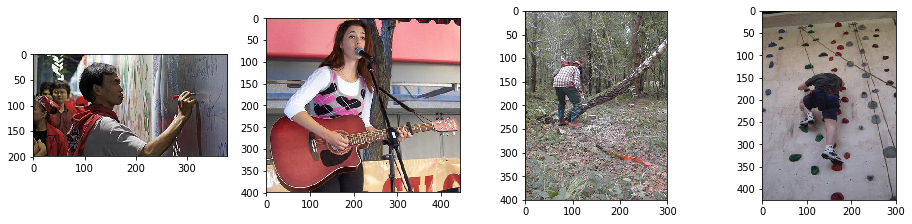

Populating the interactive namespace from numpy and matplotlib
/home/ubuntu/sd/data/train/dog/n02099712_8051.jpg
/home/ubuntu/sd/data/train/dog/n02111500_6401.jpg
/home/ubuntu/sd/data/train/dog/n02113978_2276.jpg
/home/ubuntu/sd/data/train/dog/n02096437_708.jpg


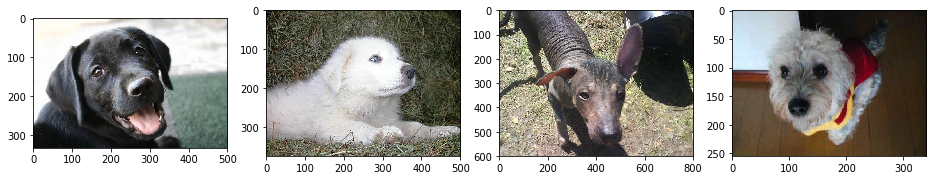

In [6]:
from glob import glob
g_h = glob(HOME+"train/human/*.jpg")
g_d = glob(HOME+"train/dog/*.jpg")

g_d = np.random.permutation(g_d)
g_h = np.random.permutation(g_h)

def displayImageFile(filePathList):

    %pylab inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    fig = plt.figure(figsize=(16, 16))

    row = 2
    col = 2
    
    for i in range(row):
        for j in range(col):
            fig.add_subplot(row*col, row*col, i*row + j + 1)
            filename = filePathList[i*row + j ]
            img=mpimg.imread(filename)
            print(filename)
            imgplot = plt.imshow(img)
    plt.show()
    
displayImageFile(g_h)
displayImageFile(g_d)

In [7]:
train_fp = np.random.permutation(train_batch.filenames)[:4]
valid_fp = np.random.permutation(valid_batch.filenames)[:4]

train_fp = [ HOME + 'train/' + f for f in train_fp ]
valid_fp = [ HOME + 'valid/' + f for f in valid_fp ]

displayRandom(train_fp)
displayRandom(valid_fp)


NameError: name 'train_batch' is not defined

## Imports and constants

In [7]:
from tensorflow.keras.preprocessing import image
BS=64

def get_batch(
    dir,
    gen          = image.ImageDataGenerator(), 
    batch_size   = 64,
    shuffle      = True,
    target_size  = (224,224)
    ):
    return gen.flow_from_directory(dir,target_size=target_size,shuffle = shuffle,batch_size = batch_size )

def get_batches(fDir):
    sTrainDir = fDir + '/train'
    sValidDir = fDir + '/valid'
    sTestDir = fDir + '/test'
    
    batch = 64
    train_batch = get_batch(sTrainDir,batch_size=batch)
    valid_batch = get_batch(sValidDir,batch_size=batch,shuffle=False)
    test_batch  = get_batch(sTestDir,batch_size=batch,shuffle=False)
    
    return train_batch,valid_batch,test_batch

In [8]:
train_batch,valid_batch,test_batch = get_batches(SHOME)

Found 1000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 400 images belonging to 1 classes.


In [9]:
# aug
# check for augmentaion
# gen = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)


In [9]:
def pyPlot(histsList,pType=['acc']):
    for pt in pType:
        plt.figure(figsize=(10,10))

        for i,h in enumerate(histsList):
            plt.subplot(2,2,i+1)    
            plt.ylim(0,1)

            plt.title('model {} {}'.format(pt,i+1))
            plt.ylabel('{}'.format(pt))
            plt.xlabel('epoch')

            plt.plot(h.history['{}'.format(pt)])
            plt.plot(h.history['val_{}'.format(pt)])

            plt.legend(['train', 'test'],loc=0)

        plt.show()

## linear model

In [10]:
def linModel():
    print("building model linModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Flatten(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model

In [11]:
print("samples in valid set - {}".format(valid_batch.samples))
model = linModel()

samples in valid set - 300
building model linModel


In [12]:
countImgs(SHOME,'train')
countImgs(SHOME,'valid')
countImgs(SHOME,'test')

==== train
human-
500
dog-
500
==== valid
human-
150
dog-
150
==== test
400


In [50]:
model = linModel()
model.optimizer.lr = 1e-4
ep=1
hist4 = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=1)

Epoch 1/1
18/17 [===============================] - 11s 603ms/step - loss: 1.4428 - acc: 0.5428 - val_loss: 2.3284 - val_acc: 0.5875


In [51]:
hist4 = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=5)

Epoch 1/5
18/17 [===============================] - 11s 585ms/step - loss: 0.7660 - acc: 0.6672 - val_loss: 1.6384 - val_acc: 0.5813
Epoch 2/5
18/17 [===============================] - 9s 472ms/step - loss: 0.5896 - acc: 0.7343 - val_loss: 2.1653 - val_acc: 0.4969
Epoch 3/5
18/17 [===============================] - 8s 458ms/step - loss: 0.5676 - acc: 0.7724 - val_loss: 1.5899 - val_acc: 0.5250
Epoch 4/5
18/17 [===============================] - 8s 467ms/step - loss: 0.4398 - acc: 0.8006 - val_loss: 1.5833 - val_acc: 0.5594
Epoch 5/5
18/17 [===============================] - 8s 463ms/step - loss: 0.3437 - acc: 0.8676 - val_loss: 1.3852 - val_acc: 0.5813


In [55]:
model = linModel()
model.optimizer.lr = 1e-5
ep=5
hist5 = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=5)

Epoch 1/5
18/17 [===============================] - 11s 635ms/step - loss: 0.8821 - acc: 0.5297 - val_loss: 3.1771 - val_acc: 0.5062
Epoch 2/5
18/17 [===============================] - 8s 456ms/step - loss: 0.7368 - acc: 0.5941 - val_loss: 1.7516 - val_acc: 0.5125
Epoch 3/5
18/17 [===============================] - 9s 497ms/step - loss: 0.6709 - acc: 0.6491 - val_loss: 1.0519 - val_acc: 0.5594
Epoch 4/5
18/17 [===============================] - 8s 450ms/step - loss: 0.6205 - acc: 0.6706 - val_loss: 0.9728 - val_acc: 0.5781
Epoch 5/5
18/17 [===============================] - 9s 474ms/step - loss: 0.5735 - acc: 0.6934 - val_loss: 0.9264 - val_acc: 0.5687


In [56]:
model = linModel()
model.optimizer.lr = 1e-6
ep=5
hist6 = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=5)

Epoch 1/5
18/17 [===============================] - 11s 597ms/step - loss: 1.1040 - acc: 0.5043 - val_loss: 1.8710 - val_acc: 0.5281
Epoch 2/5
18/17 [===============================] - 8s 448ms/step - loss: 0.9353 - acc: 0.4956 - val_loss: 1.3276 - val_acc: 0.5625
Epoch 3/5
18/17 [===============================] - 9s 484ms/step - loss: 0.8742 - acc: 0.5177 - val_loss: 1.0789 - val_acc: 0.5719
Epoch 4/5
18/17 [===============================] - 9s 481ms/step - loss: 0.8718 - acc: 0.5095 - val_loss: 0.9503 - val_acc: 0.5875
Epoch 5/5
18/17 [===============================] - 9s 484ms/step - loss: 0.8296 - acc: 0.5236 - val_loss: 0.9038 - val_acc: 0.5969


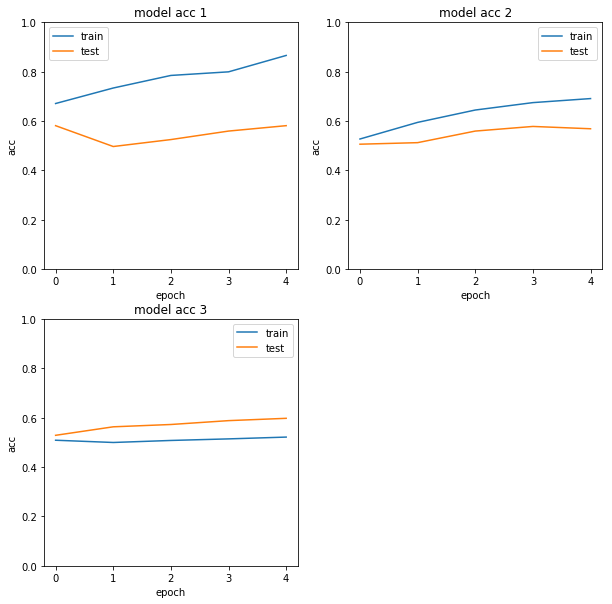

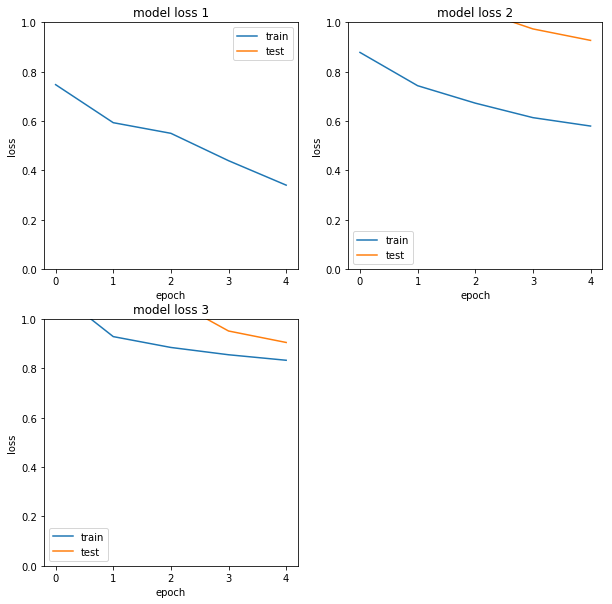

In [59]:
hist = [hist4,hist5,hist6]

pyPlot(hist,['acc','loss'])

### Double linear model

In [13]:
def dblModel():
    print("building model dblModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Flatten(),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model

In [68]:
models = []
hists = []
lrs = [1e-4,1e-5,1e-6]
ep=5

for lr in lrs:
    m = dblModel()
    print("======={}".format(lr))
    print(m)
    m.optimizer.lr = lr
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=ep)
    
    models.append(m)
    hists.append(hist)


=======0.0001
Epoch 1/5
18/17 [===============================] - 11s 585ms/step - loss: 0.5872 - acc: 0.6866 - val_loss: 0.7513 - val_acc: 0.5781
Epoch 2/5
18/17 [===============================] - 8s 462ms/step - loss: 0.5909 - acc: 0.6698 - val_loss: 0.7548 - val_acc: 0.5781
Epoch 3/5
18/17 [===============================] - 8s 459ms/step - loss: 0.5960 - acc: 0.6723 - val_loss: 0.7512 - val_acc: 0.5813
Epoch 4/5
18/17 [===============================] - 8s 469ms/step - loss: 0.5817 - acc: 0.6916 - val_loss: 0.7499 - val_acc: 0.5844
Epoch 5/5
18/17 [===============================] - 9s 472ms/step - loss: 0.5759 - acc: 0.6968 - val_loss: 0.7550 - val_acc: 0.5813
=======1e-05
Epoch 1/5
18/17 [===============================] - 10s 578ms/step - loss: 0.5771 - acc: 0.6960 - val_loss: 0.7535 - val_acc: 0.5719
Epoch 2/5
18/17 [===============================] - 8s 460ms/step - loss: 0.5804 - acc: 0.6958 - val_loss: 0.7495 - val_acc: 0.5781
Epoch 3/5
18/17 [==============================

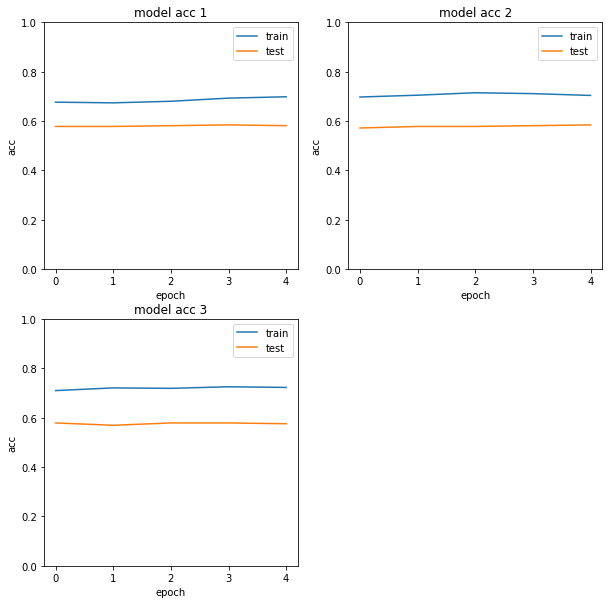

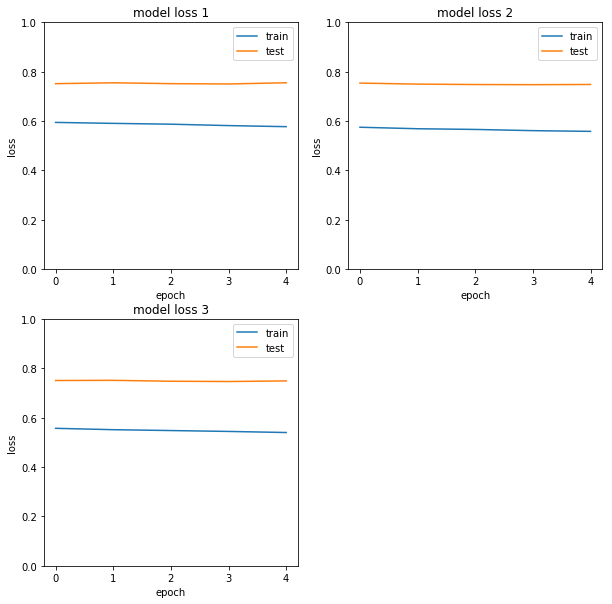

In [69]:
pyPlot(hists,['acc','loss'])

### Single conv layer

In [21]:
def convModel():
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Convolution2D(32,3,3,activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Convolution2D(64,3,3,activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Flatten(),
#         Dense(16,activation='relu'),
#         BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model

In [96]:
c_models = []
c_hists = []
lrs = [1e-4]#,1e-5,1e-6]
ep=15

for lr in lrs:
    m = convModel()
    print("======={}".format(lr))
    print(m)
#     m.optimizer.lr = lr
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=ep)
    
    c_models.append(m)
    c_hists.append(hist)

=======0.0001
Epoch 1/15
18/17 [===============================] - 11s 590ms/step - loss: 0.3803 - acc: 0.8641 - val_loss: 0.7654 - val_acc: 0.5781
Epoch 2/15
18/17 [===============================] - 8s 444ms/step - loss: 0.3769 - acc: 0.8712 - val_loss: 0.7668 - val_acc: 0.5813
Epoch 3/15
18/17 [===============================] - 8s 471ms/step - loss: 0.3837 - acc: 0.8666 - val_loss: 0.7645 - val_acc: 0.5875
Epoch 4/15
18/17 [===============================] - 9s 473ms/step - loss: 0.3781 - acc: 0.8737 - val_loss: 0.7659 - val_acc: 0.5750
Epoch 5/15
18/17 [===============================] - 9s 476ms/step - loss: 0.3811 - acc: 0.8683 - val_loss: 0.7662 - val_acc: 0.5781
Epoch 6/15
18/17 [===============================] - 8s 458ms/step - loss: 0.3700 - acc: 0.8773 - val_loss: 0.7678 - val_acc: 0.5750
Epoch 7/15
18/17 [===============================] - 9s 481ms/step - loss: 0.3710 - acc: 0.8729 - val_loss: 0.7650 - val_acc: 0.5875
Epoch 8/15
18/17 [===============================] - 8

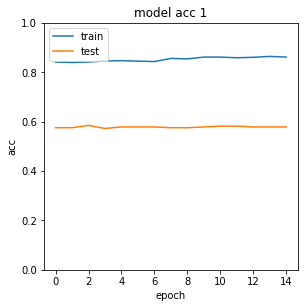

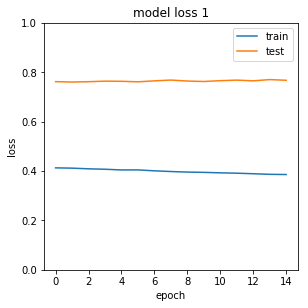

In [94]:
pyPlot(c_hists,['acc','loss'])

## single linear layer vs double linear layer vs simple conv net

In [15]:
modelType = [linModel() , dblModel() , convModel() ]
models = []
hists = []

EP=15
BS = 32

for model in modelType:
    model.summary()
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=EP)
    
    models.append(model)
    hists.append(hist)

building model linModel
building model dblModel
building model convModel
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 301058    
Total params: 301,070
Trainable params: 301,064
Non-trainable params: 6
_________________________________________________________________
Epoch 1/5
16/15 [==============================] - 10s 651ms/step - loss: 6.3861 - acc: 0.5425 - val_loss: 7.6426 - val_acc: 0.5233
Epoch 2/5
16/15 [==============================] - 7s 452ms/step - loss: 6.2988 - acc: 0.5903 - val_loss: 7.9516 - val_acc: 0.5067
Epoch 3/5
16/15 [==============================] - 8s 503ms/step

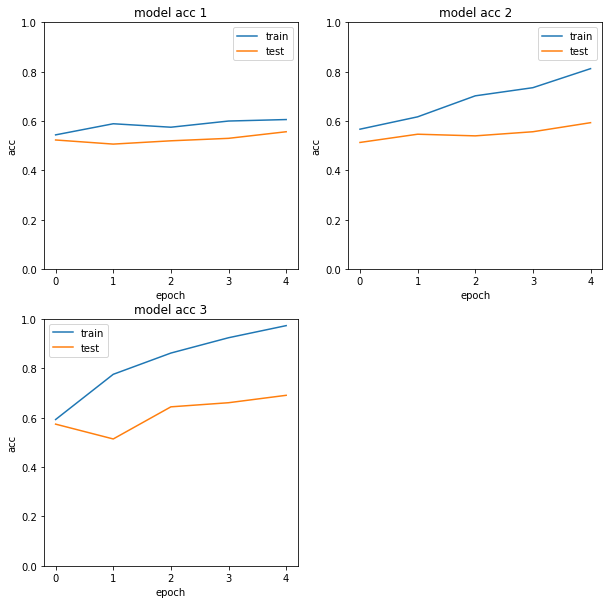

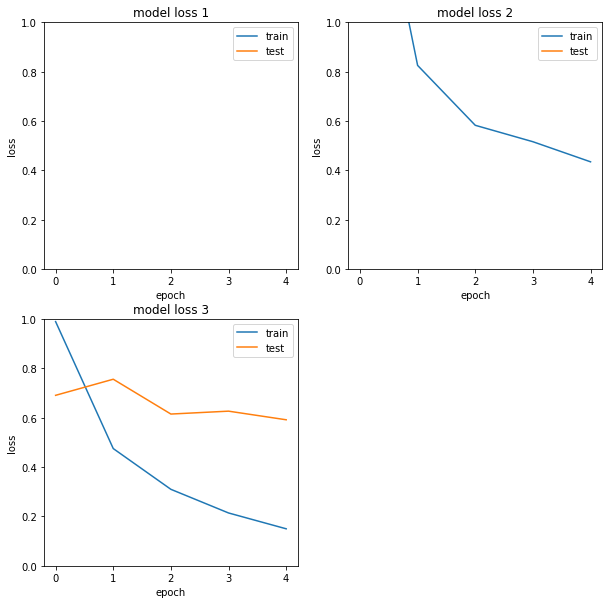

In [16]:
pyPlot(hists,['acc','loss'])

In [23]:
def convModel2():
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (224,224,3)),
        Convolution2D(16,3,3,activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Convolution2D(32,3,3,activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Flatten(),
#         Dense(16,activation='relu'),
#         BatchNormalization(),
        Dense(2,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model

In [ ]:
modelType = [ convModel2() ]#, linModel() , dblModel() ]
models = []
hists = []

EP=15
BS = 32

for model in modelType:
    model.summary()
    hist = model.fit_generator(train_batch,
                            steps_per_epoch = train_batch.samples/BS,
                            validation_data = valid_batch,
                            validation_steps = valid_batch.samples/BS,
                            epochs=EP)
    
    models.append(model)
    hists.append(hist)

building model convModel
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_27 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 74, 74, 16)        448       
_________________________________________________________________
batch_normalization_28 (Batc (None, 74, 74, 16)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
batch_normalization_29 (Batc (None, 8, 8, 32)          128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 32)      

### VGG based